<a href="https://colab.research.google.com/github/hoangdqvn/khmer-segmentation-crf/blob/main/CRF_Khmer_Segmentation_100_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Khmer Word Segmentation using Conditional Random Fields
This notebook contains the complete code that can be run to see the results as part of the approach to make this a reproducable research. Instruction is included on how to setup and run in Google Colab or any other python notebook compatible environments.

This notebook conains two sections. 
1. **Report**:  covers the report potion of this study which describe the approach, the algorithm and the results. See "CRF-Khmer-Segmnt-Report.ipynb".
1. **Code**: shows the code which detail  the setup so you can follow along and see the excution results. You can execute the code in this Python notebook directly from your browser when setup to use Google Colab or other compatible systems.

Expand each section and subsection to see detail.



# Code

## Environment Setup

### Use this notebook in Google Colab
Google Colab is currently giving free access to run Python notebook. So you can open this notebook in Google Colab and connect to an runtime which allow you to execute the code on the server from your browser. Make sure to enable  GPU as your runtime.

If you view this from github, follow the instruction on the simple steps to setup, please see the README in Githubs for detail.

https://github.com/phylypo/khmer-crf-segmentation

### Install library
Every time to freshly connect to runtime you need to update your environment. Some time reconnect will give you previous state (such as idle time out). In this case, you don't need to reinstall the module or download the data. But rerun won't hurt it as we make each step re-runable.

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/GR\ -\ HEDSPI\ K61/Khmer/CRF100

/content/drive/MyDrive/GR - HEDSPI K61/Khmer/CRF100


In [4]:
# Character `!` in the beginning of the line indicates a shell command
!pip install sklearn_crfsuite

# import of the crf library
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

     |████████████████████████████████| 747kB 6.1MB/s 


### Downloading Data
This section shows how to download and extract data to be analyzed. We save our data in github in a compressed format. There are multiple sizes depends on which one you want to analyze. We will start with 100 articles and we run through the whole process. This makes it fast to run the experiment as we fine tune different approaches. At the end we will rerun the full 10k document.

In [5]:
sizes = ["100","500","1000","5000","10000"]
# Select available size (0-4) that you want to use
docsize = sizes[0]
data_dir = "kh_" + docsize + "_line"
file_name = data_dir + ".zip"

In [ ]:
# Download the file from `url` and save it
# import urllib.request
# base_url = "https://github.com/phylypo/segmentation-crf-khmer/raw/master/data/"
# url = base_url + file_name
# print("Downloading from:", url)
# urllib.request.urlretrieve(url, file_name)

In [6]:
# Run shell command to extract files

# remove previous existing directory for rerun
!rm -rf {data_dir}
print("- Unzipping the file and show last few extracted files:")
!unzip {file_name} | tail -10

print("- Count the number of files:")
!ls -al {data_dir}/*_seg*.txt | wc -l

- Unzipping the file and show last few extracted files:
  inflating: kh_100_line/311097_orig.txt  
  inflating: kh_100_line/311092_seg.txt  
  inflating: kh_100_line/311016_seg.txt  
  inflating: kh_100_line/311043_orig.txt  
  inflating: kh_100_line/311077_seg.txt  
  inflating: kh_100_line/311054_seg.txt  
  inflating: kh_100_line/311019_seg.txt  
  inflating: kh_100_line/311088_orig.txt  
  inflating: kh_100_line/311072_seg.txt  
  inflating: kh_100_line/311085_seg.txt  
- Count the number of files:
101


In [8]:
!cat kh_100_line/311023_seg.txt
!cat kh_100_line/311023_orig.txt

នៅ ពេល ត្រឡប់ មក វិញ យន្ត ហោះ នេះ បាន ចុះ ចត នៅ កាបូល ក្រោយ ពី បាន ជួប ខ្យល់ យ៉ាង ខ្លាំង ។
គេ មិន បាន បញ្ជាក់ ថា មាន មនុស្ស ចំនួន ប៉ុន្មាន ដែល ជិះ នៅ លើ យន្ត ហោះ នោះ ទេ ប៉ុន្តែ គ្មាន អ្នក រង របួស ត្រូវ បាន រាយការណ៌ ឡើយ ។
មន្ត្រី អង្គការ ណាតូ បាន បដិសេធ ដោយ និយាយ ថា ការ ចុះ ចត ជា បន្ទាន់ ដោយ ហេតុ ផល នៃ ការ គំរាម កំហែង និង និយាយ ថា សារ ពត៌មាន ប្រទេស ចិន រាយការណ៌ ការ មិន ពិត ឡើយ ។
តំបន់ ស៊ីនេជាំង ជា តំបន់ មួយ ដែល មាន ការ បះបោរ ហិង្សា មួយ ដោយ ប្រជា ជន អ៊ុយហ្គ័រ កាល ពី ខែ មុន ។
ទូរស័ព្ទ អាយហ្វូន 3G ថ្មី របស់ ក្រុម ហ៊ុន អេបផល ត្រូវ បាន បង្ហាញ ទៅ កាន់ អតិថិ ជន នៅ ប្រទេស ទាំង 21 នៅ ថ្ងៃ សុក្រ ប៉ុន្តែ ការ លក់ ដំបូង របស់ វា ត្រូវ បាន បរាជ័យ ដោយសារ ការ ផ្គត់ផ្គង់ មាន ចំនួន តិចតួច បំផុត និង ការ ធ្វើ អោយ ទូរស័ព្ទ ដំណើរ ការ យឺត ពេក ។
ប្រព័ន្ធ ដែល ប្រើ សំរាប់ អាយហ្វូន អោយ ដំណើរ ការ សេវា មាន ការ លំបាក ដោយសារ ប្រព័ន្ធ បណ្តាញ ខូច និង គ្មាន លទ្ធ ភាព ក្នុង ការ ឆ្លើយ តប ទៅ នឹង តំរូវ ការ នូវ ថ្ងៃ លក់ ដំបូង ជា ពិសេស នៅ ក្រុម ហ៊ុន អេបផល នៅ សហ រដ្ឋ អាមេរិក ហាង AT&T និង ក្នុង ប្រទេស កាណាដា ។
ខ្សែ តំរង់ ជួរ យ៉ាង

### Option - map to google drive to get your data file
Steps to copy data file from google drive by mount the drive. This required authenticated to your Google account. Follow the prompt.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
!ls "/content/drive/MyDrive/GR - HEDSPI K61/Khmer/CRF100"*

CRF_Khmer_Segmentation.ipynb  kh_100_line  kh_100_line.zip


## Read data files

There are two formats in the list of files. 
- *_orig.txt: are the original content scrape from the website. 
- *_seg.txt: (old format) are the segmented data using space. Here you lose the original space.
- or *_seg_200b.txt: (new format) are the segmented data using   character. 

There is another file "meta.txt" which contain meta data and a corresponding url of the source for each file based on its id.

You may not see this invisible character ( ) unless you use specific tool that can view it. 'repr' in python can show this as ' '. In Windows 10, the notebook display as a red middle dot character. 

Each data file contains mulitple lines of text. Each line may end with a Khmer sentence terminator character.

We read all text into variable ***seg_text*** as a list of list string. seg_text[0] is the content of first file. 

Eg. First line of the third file would be: seg_text[3][0].

Similarly we have orig_text which read the orignal article format. This is not used for the training. This can be use to compare the orignal text with the segmented text.

In [10]:
import glob
import re

path = data_dir + '/*_seg.txt'  #  earlier format: *_seg.txt
files=glob.glob(path)

# global variables that use through out
seg_text = []
orig_text = []
# unique id of the article that can be matched to docId in meta.txt
doc_ids = []
for file in files:
  filenum = re.search(r'\d+_', file).group(0)
  doc_ids.append(filenum.replace("_",""))
  f=open(file, 'r')
  lines = f.readlines()
  f.close()
  seg_text.append(lines)
  
  # limit to 9K to avoid memory issue
  if len(seg_text) >= 9000: break #kcc=9000, char:5000, crash char on 7000
  
  # read orig text -- comment out (10K docs which do not have orig text)
  f=open(file.replace('_seg.txt', '_orig.txt'), 'r')
  lines = f.readlines()
  f.close()
  orig_text.append(lines)
  
print("number of file:", len(files))
print("number of doc_ids:", len(doc_ids)) # can see the origial text
print("len of seg_text:", len(seg_text), ' sample data[0][0]:', repr(seg_text[0][0]))
print("len of orig_text:", len(orig_text), ' sample data[0][0]:', repr(orig_text[0][0]))

number of file: 101
number of doc_ids: 101
len of seg_text: 101  sample data[0][0]: 'ចៅ ក្រម ដែល មើល ខុស ត្រូវ លើ កិច្ច ដំណើរ ការ នីតិ វិធី នៅ ក្រៅ ឃុំ នេះ បាន សម្រេច ថា Parasiris នឹង មិន បង្ក ជា ការ គំរាម កំហែង ភ្លាម ដល់ សង្គម នោះ ទេ ប៉ុន្តែ បាន ដាក់ នូវ លក្ខខណ្ឌ តឹងរ៉ឹង ទៅ លើ ការ ដោះ លែង របស់ គាត់ ។\n'
len of orig_text: 101  sample data[0][0]: 'ចៅក្រមដែលមើលខុសត្រូវលើកិច្ចដំណើរការនីតិវិធីនៅក្រៅឃុំនេះ បានសម្រេចថា Parasiris នឹងមិនបង្កជាការគំរាមកំហែងភ្លាមដល់សង្គមនោះទេ ប៉ុន្តែបានដាក់នូវលក្ខខណ្ឌតឹងរ៉ឹងទៅលើការដោះលែងរបស់គាត់។\n'


## Preview the data
You can compare the segmented text to the orignal text. Notice that the orignal text may have invisible spaces ( ). Content creators sometimes use this invisible character to separate word internally in their text editor to help with spell check but this is not consistently uses between different organization. So we cannot rely on this character as a word separator.

The segment text we choose the compound words.

In [11]:
# see other sample data - full first article
# (the 100K zip data do not have orig text to save space)
idx = 0
spacer = '\u2022'
print("First segmented text article has %d sentences/lines." %len(orig_text[idx]))
for i, sentence in enumerate(orig_text[idx]):
  print(i, ". Original : %s" %orig_text[idx][i].strip().replace(' ',spacer))
  print(i, ". Segmented: %s" %seg_text[idx][i].strip().replace(' ',spacer))

First segmented text article has 200 sentences/lines.
0 . Original : ចៅក្រមដែលមើលខុសត្រូវលើកិច្ចដំណើរការនីតិវិធីនៅក្រៅឃុំនេះ•បានសម្រេចថា•Parasiris•នឹងមិនបង្កជាការគំរាមកំហែងភ្លាមដល់សង្គមនោះទេ•ប៉ុន្តែបានដាក់នូវលក្ខខណ្ឌតឹងរ៉ឹងទៅលើការដោះលែងរបស់គាត់។
0 . Segmented: ចៅ•ក្រម•ដែល•មើល•ខុស•ត្រូវ•លើ•កិច្ច•ដំណើរ•ការ•នីតិ•វិធី•នៅ•ក្រៅ•ឃុំ•នេះ•បាន•សម្រេច•ថា•Parasiris•នឹង•មិន•បង្ក•ជា•ការ•គំរាម•កំហែង•ភ្លាម•ដល់•សង្គម•នោះ•ទេ•ប៉ុន្តែ•បាន•ដាក់•នូវ•លក្ខខណ្ឌ•តឹងរ៉ឹង•ទៅ•លើ•ការ•ដោះ•លែង•របស់•គាត់•។
1 . Original : ខណៈពេលកំពុងរង់ចាំការជំនុំជម្រះក្តី•Parasiris•ដែលមានអាយុ•41ឆ្នាំ•នឹងត្រូវទៅរស់នៅជាមួយឪពុករបស់គាត់•គោរពប្រតិបត្តិតាមបម្រាមគោចរមួយ•និងមិនត្រូវធ្វើដំណើរចេញក្រៅប្រទេសកាណាដាទេ។
1 . Segmented: ខណៈ•ពេល•កំពុង•រង់ចាំ•ការ•ជំនុំ•ជម្រះ•ក្តី•Parasiris•ដែល•មាន•អាយុ•41•ឆ្នាំ•នឹង•ត្រូវ•ទៅ•រស់•នៅ•ជាមួយ•ឪពុក•របស់•គាត់•គោរព•ប្រតិបត្តិ•តាម•បម្រាម•គោចរ•មួយ•និង•មិន•ត្រូវ•ធ្វើ•ដំណើរ•ចេញ•ក្រៅ•ប្រទេស•កាណាដា•ទេ•។
2 . Original : ក្នុងអ្វីដែលត្រូវបានគេជឿថាជាសេចក្តីសម្រេចលើកដំបូងនៃការសណ្តោសប្រណីនៅក្នុងប្រទេសកាណាដា•ដោយដោះលែងនៅក្រៅឃ

Look at word count and most frequently used words/terms.

In [12]:
words = {}
word_count = 0
sentence_count = 0
wordspref = {}
for i, text in enumerate(seg_text):
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        sentence_count += 1
        for phrase in sentence.split():
          for word in phrase.split(' '):
            if len(word)==0 : continue
            word_count += 1
            words[word] = 1 if word not in words.keys() else words[word] + 1
            pref = word.strip(' ')[:1]
            if pref in wordspref:
              wlist = wordspref[pref]
              wlist.add(word)
              wordspref[pref] = wlist
            else: wordspref[pref] = set(word)
print("total number of articles:", len(seg_text))
print("total number of sentences:", sentence_count, " words:", word_count)
print("total number of distinct words:", len(words))
print("total number of different starts-with characters:", len(wordspref))

print("Count number of words begin with: > 100")
for ws in sorted(wordspref):
    s = wordspref[ws]
    if (len(s)>100) : print("letter:", ws, " count:", len(s))

from collections import Counter
d = Counter(words)
print("Most frequent words:", d.most_common()[:20])

print("Most lease 20 words:", d.most_common()[-20:])

#for c in range(ord('ក'), ord('ឤ')):
#  print(chr(c))

### For 9K articles
#total number of articles: 9000
#total number of sentences: 87369
#total number of words: 46171
### For 100 articles (old *.seg.txt)
#total number of sentences: 1028  words: 35359
#total number of distinct words: 4628
#total number wordspref: 139

total number of articles: 101
total number of sentences: 20106  words: 715013
total number of distinct words: 25329
total number of different starts-with characters: 159
Count number of words begin with: > 100
letter: 1  count: 537
letter: 2  count: 261
letter: 3  count: 155
letter: 4  count: 119
letter: 5  count: 116
letter: A  count: 253
letter: B  count: 189
letter: C  count: 249
letter: D  count: 145
letter: F  count: 137
letter: G  count: 132
letter: H  count: 121
letter: I  count: 142
letter: L  count: 126
letter: M  count: 241
letter: N  count: 122
letter: P  count: 199
letter: R  count: 145
letter: S  count: 298
letter: T  count: 155
letter: W  count: 128
letter: ក  count: 1044
letter: ខ  count: 640
letter: គ  count: 388
letter: ឃ  count: 137
letter: ច  count: 523
letter: ឆ  count: 178
letter: ជ  count: 457
letter: ដ  count: 523
letter: ឌ  count: 242
letter: ណ  count: 246
letter: ត  count: 414
letter: ថ  count: 203
letter: ទ  count: 341
letter: ធ  count: 159
letter: ន  count: 2

In [13]:
# finding some words
w = 'ប្រអប់' #'ឧត្តរ' #'ពិពិធកម្ម'#"អាមេរិក"
if w in words.keys(): print("found word ", w, "count:", words[w])

# test finding string
found = []
for i, text in enumerate(seg_text):
    for sentence in text:
        if w in sentence: found.append(sentence)
print("total # sentences found:", len(found))
for f in found:
  print("-sentence: %s" %(repr(f)))

found word  ប្រអប់ count: 38
total # sentences found: 35
-sentence: 'សំណាក សិក្សា មេរោគ នឹង ត្រូវ បាន បំផ្លាញ ចោល ដោយសារ ប្រអប់ ត្រជាក់ មិន ដំណើរ ការ បន្ទាប់ ពី ការ ផ្គត់ផ្គង់ ថាមពល អគ្គិសនី ត្រូវ បាន កាត់ ផ្តាច់ សម្រាប់ ហេតុ ផល សុវត្ថិភាព ក្នុង អំឡុង ពេល ពន្លត់ អគ្គី ភ័យ ។\n'
-sentence: 'អនុ ប្រធាន SAS លោក អាល់ប៊ើត បេអឺ បាន ប៉ាន់ ប្រមាណ ថា តម្លៃ នៃ ប្រអប់ ត្រជាក់ នោះ មាន តម្លៃ ជិត ពីរ លាន អឺរ៉ូ ។\n'
-sentence: 'នៅ ក្នុង ផ្ទះ ទាំង នោះ យើង បាន ជីក គំនូស ស្នាម នៅ លើ កំរាល ឥដ្ឋ នៃ គ្រែ ប្រអប់ និង ទូ សម្អាង ឈើ ឬ ទូ ចាន " លោក ម៉ៃ ផាឃឺ ភាសាន់ អ្នក បុរាណ វិទូ សកល វិទ្យាល័យ ស្ស៊ឺហ្វៀល បាន និយាយ ។\n'
-sentence: 'ពូក អ្នក ស្រាវជ្រាវ និយាយ ថា បរុស ២ នាក់ អះអាង ជា អ្នក បរ បាញ់ " ប្រអប់ ជើង ធំ " នៅ ហ្សកហ្សា សហ រដ្ឋ អាមេរិក ចំពោះ ការ រក ឃើញ ស្នាម នៅ សល់ របស់ សត្វ ចំឡែក នៅ ដើម ខែ នេះ គឺ ជា ផ្នែក មួយ នៃ ការ បោក បញ្ឆោត យ៉ាង ច្បាស់ ។\n'
-sentence: 'របាយការណ៍ បាន បញ្ជាក់ ថា គាត់ កំពុង កាន់ ប្រអប់ មួយ ដែល គាត់ បាន ពណ៌នា ថា ជា គ្រាប់ បែក ហើយ និង បំផ្ទុះ វា ប្រសិន បើ មិន បំពេញ តាម ការ ទាម ទារ របស់ គាត់ ដើម្

## Prepare Data
Each  seg text contains list of sentences. We want a list of sentences in variable 'sentences'. We also clean up the extra spaces or new line character.

Here we allow to fix any known bad segmented data such as names.

### Correction list

In [14]:
# the str assume \200b wrapped around any spaces -- this can be removed during output
# the first set use 200b string that may not visible in the note book. 
# Windows 10 shows as middle dot in Colab Classic Mode.
# the bottom set us   instead for easy to spot
def get_correction_list():
  fixes=[]
  #fix bad segmented data - especially proper noun
  fixes.append(['អា​ខោន​','អាខោន​']) #account 
  fixes.append(["​ឱវា​ទ","​ឱវាទ"])
  fixes.append(["នៅ​សប្តា​ហ៏​","នៅ​សប្តាហ៏​"])
  fixes.append(['ស៊ុន​ ​ចាន់​ថុល','ស៊ុន​ ​ចាន់ថុល'])
  fixes.append(['សាយ​ ​មក​រា','សាយ​ ​មករា'])
  fixes.append(['រោង​កុន','រោងកុន'])
  fixes.append(['ដេី​មជ្រៃ','ដេីមជ្រៃ'])
  fixes.append(['​ដេី​ម​','​ដេីម​'])
  fixes.append(['មន្ទី​ពេទ្យ','មន្ទីពេទ្យ'])
  fixes.append(['ជាដរាបត​ទៅ','ជា​ដរាប​តទៅ'])
  fixes.append(['ដេី​ម្បី​','ដេីម្បី​'])
  fixes.append(['ធ្វេី​ការកាត់​យក','ធ្វេីការ​កាត់​យក']) # interesting!!!!
  fixes.append(['ភូមិ​ផ្សារ​ដី​ហុយ','ភូមិ​ផ្សារដីហុយ'])
  fixes.append(['សុខ​ ​ពេញ​វុធ','សុខ​ ​ពេញវុធ'])
  fixes.append(['ប្រតិបត្តិការបង្ក្រាប','ប្រតិបត្តិការ​បង្ក្រាប'])
  fixes.append(['health​.​com​.​kh','health.com.kh'])
  fixes.append(['ពួយ​ ​ច័ន្ទ​សុគុណ','ពួយ​ ​ច័ន្ទសុគុណ'])
  fixes.append(['ភូមិ​ ​ថ្ម​ដា','ភូមិ​ ​ថ្មដា'])
  fixes.append(['សង្កាត់​ ​បឹង​កន្សែង','សង្កាត់​ ​បឹងកន្សែង']) # TODO what is orig text???
  fixes.append(['ក្រុង​ ​បាន​លុង','ក្រុង​ ​បានលុង'])
  fixes.append(['នុត​ ​សុគន្ធ​ ​ផាន់​នី','នុត​ ​សុគន្ធ​ ​ផាន់នី'])
  #fixes.append(['ព្រះរាជាណា ច្រក កម្ពុជា','ព្រះរាជាណាច្រ ក កម្ពុជា']) #bad spelling – no better seg
  fixes.append(['កាក​បាត​ក្រហម','កាកបាត​ក្រហម']) # from https://www.redcross.org.kh/ កាកបាទក្រហមកម្ពុជា
  fixes.append(['ស្រុក​ ​កំពង់ត្រា​ច','ស្រុក​ ​កំពង់ត្រាច'])
  fixes.append(['ឃុំ​ ​ថ្ម​កែវ','ឃុំ​ ​ថ្មកែវ'])
  fixes.append(['ស្រុក​ ​អង្គរ​ជ័យ','ស្រុក​ ​អង្គរជ័យ'])
  fixes.append(['កោះ​តា​កូវ ឃុំ​ឬ​ស្សី','កោះ​តាកូវ ឃុំ​ឬស្សី'])
  fixes.append(['ម៉ាក​ ​សែន​សូនីតា','ម៉ាក​ ​សែនសូនីតា'])
  fixes.append(['ជា​ ​ដេី​ម​ ​នោះ','ជា​ ​ដេីម​ ​នោះ'])
  fixes.append(['ដេី​ម្បី​ ​ជ្រាប','ដេីម្បី​ ​ជ្រាប']) #prob eiy is two chars េ ⁣ី instead of one char
  fixes.append(['ក​រករណី','ករ​ករណី'])
  fixes.append(['ទោ​ចក្រ​យានយន្ត','ទោចក្រយានយន្ត'])
  fixes.append(['ឃុំ​ ​អន្លង់​វិល','ឃុំ​ ​អន្លង់វិល'])
  fixes.append(['​ពោធ៍​សាត់','​ពោធ៍សាត់'])
  fixes.append(['ណាក់​ ​ស្រី​ណា','ណាក់​ ​ស្រីណា'])
  fixes.append(['ពិធីការ​នីមួយ','ពិធីការនី​មួយ']) #valid both ways, need context
  fixes.append(['តូរុន​តូ','តូរុនតូ']) #Toronto
  fixes.append(['ដាយ​ណូស័រ','ដាយណូស័រ']) #Dinosaur
  fixes.append(['ហ្គារ៉ាល់​ហូស','ហ្គារ៉ាល់ហូស']) #Guarulhos in Sao Paulo
  fixes.append(['ខេមរៈ​ ​សិរី​មន្ត','ខេមរៈ​ ​សិរីមន្ត'])#ខេមរៈ  សិរី មន្ត
  fixes.append(['ឱម​ ​យ៉ិន​ទៀង','ឱម​ ​យ៉ិនទៀង'])
  fixes.append(['មហា​លាប','មហាលាប'])
  fixes.append(['ការចាប់អារម្ម​ណ៏​','ការចាប់អារម្មណ៏​'])
  fixes.append(['វ៉ិច​ទ័រ​','វ៉ិចទ័រ​']) #rector
  fixes.append(['សុវណ្ណ​ ​ឬ​ទ្ធី','សុវណ្ណ​ ​ឬទ្ធី'])
  fixes.append(['ខាន់​ ​ចាន់​សុផល','ខាន់​ ​ចាន់សុផល'])
  fixes.append(['ទំនួលខុសត្រូវ​','ទំនួល​ខុសត្រូវ​'])
  fixes.append(['ឯ​ណេះ','ឯណេះ']) #confirm with Chuon Nath Dict
  fixes.append(['ហេយ៍​វ៉ិន','ហេយ៍វ៉ិន']) #heaven
  fixes.append(['សុខ​ ​ពេញ​វុធ','សុខ​ ​ពេញវុធ'])
  fixes.append(['វ៉ុល​កា','វ៉ុលកា']) #vulgar
  fixes.append(['ជា​ម​ ​ហុី​ម','ជាម​ ​ហុីម'])
  fixes.append(['​ការ​ប្រកាស​','​ការប្រកាស​'])
  fixes.append(['អនុ​ប្រធាន','អនុប្រធាន'])
  fixes.append(['កិច្ចខិតខំប្រឹងប្រែង','កិច្ច​ខិតខំ​ប្រឹងប្រែង']) #???
  fixes.append(['សស្អាត','ស​ស្អាត'])
  fixes.append(['ហាន់​ ​ជី​អ៊ុន','ហាន់​ ​ជីអ៊ុន'])
  fixes.append(['ស៊ុន​ ​ចាន់​ថុល','ស៊ុន​ ​ចាន់ថុល'])
  fixes.append(['លីន​ដា​','លីនដា​'])
  fixes.append(['យានយន្តបន្ទាប់ពី','យានយន្ត​បន្ទាប់ពី'])
  fixes.append(['ព្រៃ​ស្អាក​ស្រុក​អន្លង់​វែង','ព្រៃស្អាក​ស្រុក​អន្លង់វែង'])
  fixes.append(['​ប៉ា​កុង​','​ប៉ាកុង​']) # first 50 articles
  fixes.append(['ឈើ​ ​អុស​ក្រាក់','ឈើ​ ​អុសក្រាក់'])
  fixes.append(['រតនៈ​គីរី​','រតនៈគីរី​'])
  fixes.append(['ឯក​ឧត្តម','ឯកឧត្តម'])
  fixes.append(['ឱម​ ​យិន​ទៀង','ឱម​ ​យិនទៀង'])
  fixes.append(['​ចំដែនដី​','​ចំ​ដែនដី​']) # orig has space after រៀប
  fixes.append(['ឱវា​ទ','ឱវាទ']) # correct spelling
  fixes.append(['អ៊ិន​វេស​មិន','អ៊ិនវេសមិន']) #investment
  fixes.append(['សហគម​ន៏','សហគមន៏'])
  fixes.append(['​គ្រូ​សារ​','​គ្រូសារ​']) # orig has bad ub, mispelled but should be removed before seg
  fixes.append(['សុផុនពេល​សួរ','សុផុន​ពេល​សួរ'])
  fixes.append(['ស្រុក​កែវ​សីម៉ា','ស្រុក​កែវសីម៉ា'])
  fixes.append(['ហាន់​ជ័យ','ហាន់ជ័យ'])
  fixes.append(['បូរី​ ​ស​ចនសុន','បូរីស​ ​ចនសុន'])
  fixes.append(['បូរី​ ​ស​ចន​សុន','បូរីស​ ​ចនសុន'])
  fixes.append(['បូរីស​ ​ចន​សុន','បូរីស​ ​ចនសុន'])
  fixes.append(['អំណ​រ​គុណ','អំណរ​គុណ']) # bad orig
  fixes.append(['ផលប៉ះពាល់​','ផល​ប៉ះពាល់​']) # ???
  fixes.append(['អ្នកវិនិយោគ​','អ្នក​វិនិយោគ​']) #???
  fixes.append(['ភូមិ​ ​ស្រះ​ជ្រៃ​','ភូមិ​ ​ស្រះជ្រៃ​'])
  fixes.append(['ឃុំ​ ​បន្ទាយ​ឆ្មា​','ឃុំ​ ​បន្ទាយឆ្មា​'])
  fixes.append(['ស្រុក​ ​ថ្ម​ពួក​','ស្រុក​ ​ថ្មពួក​'])
  fixes.append(['ទ្វីត​ធឺ','ទ្វីតធឺ']) #twitter
  fixes.append(['​ធំ​ដុំ','​ធំដុំ'])
  fixes.append(['​រួមមាន​','​រួម​មាន​']) #?
  fixes.append(['គុយ​វ៉ែត','គុយវ៉ែត'])
  fixes.append(['ងងុយគេង','ងងុយ​គេង'])
  fixes.append(['ស​ម​ ​រង្ស៊ី','សម​ ​រង្ស៊ី'])
  fixes.append(['សោ​ ​ចាន់​ដេត','សោ​ ​ចាន់ដេត'])
  fixes.append(['ជាលាយលក្ខណ៍អក្សរ','ជា​លាយលក្ខណ៍​អក្សរ'])
  fixes.append(['ផលិតកម្មវិធី','ផលិតកម្ម​វិធី'])
  fixes.append(['​សាជាថ្មី​','​សា​ជា​ថ្មី​']) # ???
  fixes.append(['ឧកញ៉ា​ស្រី​ ​ចាន់​ថន','ឧកញ៉ា​ ​ស្រី​ ​ចាន់ថន'])
  fixes.append(['ភូមិ​ ​ព្រៃ​ល្វា','ភូមិ​ ​ព្រៃល្វា'])
  fixes.append(['សង្កាត់​ ​ចោម​ចៅ ','សង្កាត់​ ​ចោមចៅ'])
  fixes.append(['ខណ្ឌ​ ​ពោធិ៍​សែន','ខណ្ឌ​ ​ពោធិ៍សែន'])
  fixes.append(['ឃុំ​ ​ព្រែក​តា​មាក់','ឃុំ​ ​ព្រែកតាមាក់'])
  fixes.append(['​បាត់បង្ក','​បាត់​បង្ក'])
  fixes.append(['កើតមានឡើង','កើត​មាន​ឡើង'])
  fixes.append(['លូក​លាន់','លូកលាន់'])
  fixes.append(['លោក​ ​ជិន​ ​ម៉ាលី​ន','លោក​ ​ជិន​ ​ម៉ាលីន'])
  fixes.append(['អ្នករាយការណ៍','អ្នក​រាយការណ៍'])
  fixes.append(['គង់​ ​រ៉ៃ​យ៉ា','គង់​ ​រ៉ៃយ៉ា'])
  fixes.append(['លោក​ ​សួង​ ​នាគ​ព័ន្ធ','លោក​ ​សួង​ ​នាគព័ន្ធ'])
  fixes.append(['ធ្វើទុក្ខបុកម្នេញ','ធ្វើ​ទុក្ខបុកម្នេញ'])  # doc 75 mark
  fixes.append(['បោះបង់ចោល','បោះបង់​ចោល'])
  fixes.append(['ខ្លួនឯង','ខ្លួន​ឯង']) # ???
  fixes.append(['សប្បាយចិត្ត','សប្បាយ​ចិត្ត'])
  fixes.append(['មើលទៅ','មើល​ទៅ']) # ??? if
  fixes.append(['សោយសុខ','សោយ​សុខ'])
  fixes.append(['ទៅលើ','ទៅ​លើ'])
  fixes.append(['ឃុំខ្លួន','ឃុំ​ខ្លួន'])
  fixes.append(['ជាប់ឃុំ','ជាប់​ឃុំ'])
  fixes.append(['លោក​ ​ហេង​ ​ដូន​នី','លោក​ ​ហេង​ ​ដូននី'])
  fixes.append(['លោក​ ​កែម​ ​គិម​ស្រន់','លោក​ ​កែម​ ​គិមស្រន់'])
  fixes.append(['ស្រុក​ ​វាល​វែង','ស្រុក​ ​វាលវែង'])
  fixes.append(['ចោទប្រកាន់តែ','ចោទប្រកាន់​តែ']) # doc 80 mark
  fixes.append(['ឈិញ​ ​ស៊ី​ថា','ឈិញ​ ​ស៊ីថា'])
  fixes.append(['ដាក់ពាក្យបណ្តឹង','ដាក់​ពាក្យ​បណ្តឹង'])
  fixes.append(['ម៉ាក​ ​ណូ​គា','ម៉ាក​ ​ណូគា'])
  fixes.append(['ធូ​ ​ស្រី​ទូច','ធូ​ ​ស្រីទូច'])
  fixes.append(['ម៉ូតូកង់​បី','ម៉ូតូ​កង់​បី'])
  fixes.append(['ឃុំ មង់​រៀវ','ឃុំ មង់រៀវ'])
  fixes.append(['លោក​ ​ជា​ ​ចាន់​តូ','លោក​ ​ជា​ ​ចាន់តូ'])
  fixes.append(['ស៊ែ​ស្វី​ច','ស៊ែ​ស្វីច']) #shared switch
  fixes.append(['ប្រតិបត្តិការផ្ទេរ','ប្រតិបត្តិការ​ផ្ទេរ'])
  fixes.append(['បញ្ជាការស្រាល','បញ្ជាការ​ស្រាល'])
  fixes.append(['F​-​16','F-16'])
  fixes.append(['C​-​17','C-17'])
  fixes.append(['គោលនយោបាយ','គោល​នយោបាយ']) # id 90 mark
  fixes.append(['ហាន​ ​សុខ​ន','ហាន​ ​សុខន'])
  fixes.append(['ខៀវ​ ​ទេ​ព','ខៀវ​ ​ទេព'])
  fixes.append(['កាញារី​ទ្ធ','កាញារីទ្ធ'])
  fixes.append(['ជី​ហែ','ជីហែ']) # ផ្សារជីហែ
  fixes.append(['វិទ្យាល័យ​ ​ជី​ហែរ','វិទ្យាល័យ​ ​ជីហែរ'])
  fixes.append(['ស្រុកោះ​កោះ​សូទិន','ស្រុកោះ​កោះសូទិន'])
  fixes.append(['ជំរុញឲ្យ','ជំរុញ​ឲ្យ'])
  fixes.append(['ការបាក់ទឹកចិត្ត','ការបាក់​ទឹកចិត្ត'])
  fixes.append(['ហង់ ជួន​ណារីតា','ហង់ ជួនណារីតា'])
  fixes.append(['ជាទីមោទនៈ','ជា​ទី​មោទនៈ'])
  fixes.append(['សឿ សុជា​តា','សឿ សុជាតា'])
  fixes.append(['ហង់​ ​ជួន​ណារ៉ុន','ហង់​ ​ជួនណារ៉ុន'])
  fixes.append(['ក​សាង​ធនធាន','កសាង​ធនធាន'])
  fixes.append(['ស្នង​ឬ​ស្សី','ស្នង​ឬស្សី'])
  fixes.append(['ខៀវ​ ​កាញារី​ទ្ធ','ខៀវ​ ​កាញារីទ្ធ'])
  fixes.append(['ត្រេន​ ​ដី​ង','ត្រេនដីង']) #trending
  fixes.append(['ទៅវិញទៅមក','ទៅ​វិញ​ទៅ​មក']) # ??
  fixes.append(['ក្ដី​ស្រមៃ','ក្ដីស្រមៃ']) #prob mispell jerg da
  fixes.append(['ឬ​ស្សីកែវ','ឬស្សីកែវ'])
  fixes.append(['អេង​ ​សុវណ្ណ​តារា','អេង​ ​សុវណ្ណតារា'])
  fixes.append(['កុង​ទីន​រ័','កុងទីនរ័'])
  fixes.append(['ជាបន្តបន្ទាប់','ជា​បន្តបន្ទាប់'])
  fixes.append(['ចលត័ជាប្រចាំ','ចលត័​ជា​ប្រចាំ'])
  fixes.append(['ឃុំ​ដី​ឥដ្ឋ','ឃុំ​ដីឥដ្ឋ'])
  fixes.append(['វី​ដែ​អូ','វីដែអូ']) #misspell វីដេអូ 
  fixes.append(['ត្រី​ខ​','ត្រីខ​'])
  fixes.append(['ទឹក​ត្រី​','ទឹកត្រី​'])
  fixes.append(['បង្ខំឲ្យ','បង្ខំ​ឲ្យ']) # first hundred docs
  fixes.append(['ស្ដុក ប្រវឹក','ស្ដុកប្រវឹក'])
  fixes.append(['វាល រិញ ','វាលរិញ '])
  fixes.append(['ណៃ   វង្ស ដា','ណៃ   វង្សដា'])
  fixes.append(['លោក   ឃ ន  ជឺ ','លោក   ឃន   ជឺ '])
  fixes.append(['បុត   ចាន់ ណា','បុត   ចាន់ណា'])
  fixes.append(['ឯ ម   ច័ន្ទ មក រា','ឯម   ច័ន្ទមករា'])
  fixes.append(['សង់ ដ្រី ន   ឌុយ រី','សង់ដ្រីន   ឌុយរី'])
  fixes.append(['សុខ   ពេញ វុធ','សុខ   ពេញវុធ'])
  fixes.append(['សោម  ពុទ្ធ តារា','សោម  ពុទ្ធតារា'])
  fixes.append(['ម៉ៅ  ច័ន្ទ មធុរិទ្ធ','ម៉ៅ  ច័ន្ទមធុរិទ្ធ'])
  fixes.append(['បូពិន្ទ  ណា រ័ត្ន','បូពិន្ទ  ណារ័ត្ន'])
  fixes.append(['ជា   ប៊ុន ហេង','ជា   ប៊ុនហេង'])
  fixes.append(['ណារិក ដ្រា   មូឌី','ណារិកដ្រា   មូឌី'])
  fixes.append(['ស្រុក ព្រៃ នប់','ស្រុក ព្រៃនប់'])
  fixes.append(['ស្រុក ព្រៃ នប់','ស្រុក ព្រៃនប់'])
  fixes.append(['ខណ្ឌ ចំការ មន','ខណ្ឌ ចំការមន'])
  fixes.append(['ខណ្ឌ ពោធិ៍ សែន ជ័យ','ខណ្ឌ ពោធិ៍សែនជ័យ'])
  fixes.append(['សង្កាត់ ទឹក ល្អក់','សង្កាត់ ទឹកល្អក់'])
  fixes.append(['សង្កាត់ ផ្សារ ថ្មី','សង្កាត់ ផ្សារថ្មី'])
  fixes.append(['សង្កាត់ ជ្រោយ ចង្វារ','សង្កាត់ ជ្រោយចង្វារ'])
  fixes.append(['សង្កាត់ វាល វង់','សង្កាត់ វាលវង់'])
  fixes.append(['សង្កាត់ កោះ ដាច់','សង្កាត់ កោះដាច់'])
  fixes.append(['សង្កាត់ ចាក់អង្រែ លើ','សង្កាត់ ចាក់អង្រែលើ'])
  fixes.append(['សង្កាត់ ទន្លេ បាសាក់','សង្កាត់ ទន្លេបាសាក់'])
  fixes.append(['ឃុំ ត្រពាំង ជោ','ឃុំ ត្រពាំងជោ'])
  fixes.append(['ឃុំ ក្រាំង ល្វា','ឃុំ ក្រាំងល្វា'])
  fixes.append(['ឃុំ ដូន សរ','ឃុំ ដូនសរ'])
  fixes.append(['ឃុំ អូរ តាប៉ោង','ឃុំ អូរតាប៉ោង'])
  fixes.append(['ឃុំ ក្បាល ដំរី','ឃុំ ក្បាលដំរី'])
  fixes.append(['ឃុំ ត្រពាំង គង','ឃុំត្រពាំងគង'])
  fixes.append(['ភូមិ ច្រក ទៀក','ភូមិ ច្រកទៀក'])
  fixes.append(['ភូមិ ខ្សាច់ ស','ភូមិ ខ្សាច់ស'])
  fixes.append(['ភូមិ អូរ ត្រូន','ភូមិ អូរត្រូន'])
  fixes.append(['ភូមិ ថ្ម ធំ','ភូមិ ថ្មធំ'])
  fixes.append(['ភូមិ ចំការ ដូង','ភូមិ ចំការដូង'])
  fixes.append(['ភូមិ ព្រៃ ផ្តៅ','ភូមិ ព្រៃផ្តៅ'])
  fixes.append(['ភូមិ បឹង វែង','ភូមិ បឹងវែង'])
  fixes.append(['   .   com ','.com '])
  fixes.append(['ចូ   បាយ ដិន','ចូ   បាយដិន'])
  fixes.append([' ណាន់ ស៊ី ',' ណាន់ស៊ី '])
  fixes.append(['លោក ត្រាំតទៅទៀត','លោក ត្រាំ តទៅទៀត'])

  #fixes.append(['','']) #u200bប៊ុល ហ្គារី  ,   ហុង គ្រី  Hungary
  return fixes


fixes = get_correction_list()
print("count", len(fixes), " data[0]:", fixes[0])

count 199  data[0]: ['អា\u200bខោន\u200b', 'អាខោន\u200b']


### Parse and correct sentences

In [15]:
def correct_str(str):
  for f in fixes:
    str = str.replace(f[0], f[1])
  return str

def cleanup_str(str):
  str = str.strip(' ').strip()
  str = str.replace("  ", " ") # clean up 2 spaces to 1
  str = str.replace(" ", "   ")   # ensure 200b around space
  # clean up
  str = str.replace("  ", ' ')   # clean up dupe 200b
  str = str.replace("  ", ' ')   # in case multiple
  str = correct_str(str) # assume space has 200b wrapped around
  
  # remove special characters
  str = str.replace(u"\u2028", "") # line separator
  str = str.replace(u"\u200a", "")  # hair space
  str = str.strip().replace('\n','').replace('  ',' ')
  return str

# setup training data using seg
sentences = list()
for i, text in enumerate(seg_text):
    for sentence in text:
        sentences.append(cleanup_str(sentence))
print("total len of sentences:", len(sentences))

# id=99
# print("id:",doc_ids[id])
# for i,s in enumerate(seg_text[id]):
#   print("sample sentence: %s" %(cleanup_str(s)))
#   print("orig sentence: %s" %(repr(orig_text[id][i])))


total len of sentences: 20106


### Check count and searching

In [16]:
# search more match text in the correction list
import re
total = 0
for sen in sentences[0:813]: #todo search small set only
  for f in fixes:
    m = [m.start() for m in re.finditer(f[0], sen)]
    n = [m.start() for m in re.finditer(f[1], sen)]
    if len(m) >0:
      total += len(m)
      s = sen[m[0]:(m[0]+20)]
      #if (len(m)) > 0: print(total, "len:", len(m), " str:", repr(f[0]), "sen:", sen)
      #print("match: search=", repr(f[0]), "fix:", repr(f[1]), " sen:", repr(s))
      
print("total corrections:",total, " total sen:", len(sentences)) #127 -> 147/871



total corrections: 0  total sen: 20106


In [17]:
# search Orig text
found = []
s = "អាក្រក់".strip()
#s = "លោក".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  #print("start idx:", sidx, eidx, "len:", len(sen))
  #print("Found s:", repr(sen[sidx:eidx]))
  print("Found s:", sen[sidx:eidx].replace(' ', spacer))

total len of found: 130
Found s: ងក្រៅយល់ថាអាក្រក់បែបណានោះទេ។

Found s: ឿងបេតធីរូបអាក្រក់•ជារឿងភាគដែលឆ្លុះបញ្ចាំងពីក្មេងស្រីធម្
Found s: ុន•សុបិន្តអាក្រក់របស់គាត់បាន•ចាប់ផ្តើមនៅខែវិច្ឆិកា•ឆ្នា
Found s: ​•"រឿងដែល​អាក្រក់បំផុត•ដែលខ្ញុំធ្លាប់​បានឃើញ​នៅក្នុង​ជី
Found s: ូ​នេះ​ថា•"អាក្រក់•អាក្រក់ខ្លាំងណាស់"•ហើយ​គេ•"•អាច​មើលឃើ
Found s: ួល​លទ្ធផល​អាក្រក់​ជាង​ការរំពឹងទុក​ពី​ការស្ទង់មតិ​ដែលបាន
Found s: ថា•"អ្នកគឺអាក្រក់ជាងChamberlianទៅទៀត!"•យោងទៅអ្នកសម្របសម
Found s: •ការចាញ់ដ៏អាក្រក់"និងបានបន្ទោសទៅលើស្ថានភាពសេដ្ឋកិច្ច•ដូ
Found s: ងមុខទទួលផលអាក្រក់ជាខ្លាំងពីគ្រោះថ្នាក់នេះ។"

Found s: ់រថភ្លើងដ៏អាក្រក់បំផុតក្នុងប្រវត្តិសាស្ត្ររបស់ម៉ុងតេណេហ
Found s: ភេរវកម្មដ៏អាក្រក់បំផុតនៅអ៊ីស្តាន់ប៊ូលចាប់តាំងពីការផ្ទុះ
Found s: ជា•"កន្លែងអាក្រក់បំផុត"•សម្រាប់កូនរបស់គាត់ដែលត្រូវថែទាំ
Found s: រពិសោធន៏ដ៏អាក្រក់នេះ។

Found s: ម្រេចចិត្តអាក្រក់ខ្លាំងណាស់។"

Found s: •"មានចេតនាអាក្រក់មួលបង្កាច់"•ច្បាប់ប្រឆាំងការផ្តាច់ខ្លួ
Found s: "សុបិនអាក្រក់ដែលចៀសមិនរួចដែលយើងបានភ័យខ្លាច•ឥឡូវនេះត
Found s: ឹកជំនន់ដែលអាក្រក់បំផុតក្នុ

In [18]:
#search segmented text

#អ្នក ក្តៅ ចិត្ត  <= អ្នកក្តៅចិត្ត, តួរ ចិត្ត អាក្រក់<= តួរចិត្ត អាក្រក់,  ថាមពល<=ថា មពល, ម្យ៉ាងទៀត<=ម្យ៉ាង ទៀត, កិច្ចការពារ <=កិច្ច ការពារ, 
#មហា អំណាច <= មហាអំណាច , អំពើហិង្សា<=អំពើ ហិង្សា, ញាំ ក្រូច ថ្លុង<=ញាំក្រូចថ្លុង , ខ ប៉េងប៉ោះ<=ខ ប៉េងប៉ោះ, 
# ម តិ , ម៉ៅ•សេ•ទុង=>ម៉ៅ•សេទុង•

# search final text
s = "ម្អ"
spacer = '\u2022'
found = []
for i, text in enumerate(sentences): #enumerate(seg_text):
    if s in text: found.append(text)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  print("Found s:", sen[sidx:eidx].replace(' ',spacer))

total len of found: 115
Found s: ត្តិ•ការ•សម្អាត•ទឹក•"•ដោយ•ការ•រួម•គ្នា•ពី•កង•ទ័ព•ជើង•ទឹ
Found s: ត្តិ•ការ•សម្អាត•ទឹក•នឹង•ពិត•ជា•ត្រូវ•បាន•រឹប•អូស•ដោយ•រដ
Found s: ចង្ក្រាន•ចម្អិន•ស៊ុប•សាមញ្ញ•មួយ•។•"
Found s: ់•ឲ្យ•ទៅ•សម្អាត•ផ្ទះ•នោះ•និង•ជួយ•សង្គ្រោះ•ផ្ទះ•ជុំវិញ•ន
Found s: េល•កំពុង•សម្អាត•ព្រិល•ចេញ•ពី•ទ្រព្យ•សម្បត្តិ•របស់•គាត់•
Found s: ង•បាន•កែ•លម្អ•នៅ•តង់•ទី•ពីរ•ប៉ុន្តែ•ការ•ការពារ•ដ៏•រឹង•ម
Found s: •បាន•បោស•សម្អាត•]•ទាំង•ស្រុង•ទី•ក្រុង•របស់•ការ•តាំង•ទី•
Found s: •ព័ត៌មាន•លម្អិត•ច្រើន•ឡើយ•ហើយ•ប្រព័ន្ធ•ផ្សព្វ•ផ្សាយ•ក្ន
Found s: •ព័ត៌មាន•លម្អិត•ពេញលេញ•។
Found s: គលិក•បោស•សម្អាត•កន្លែង•ប៉ះ•ទង្គិច•នោះ•។
Found s: •ឬ•ជា•ទូ•សម្អាង•។
Found s: ់•និង•ទូ•សម្អាង•ឈើ•ឬ•ទូ•ចាន•"•លោក•ម៉ៃ•ផាឃឺ•ភាសាន់•អ្នក•
Found s: ម•សំរាប់•សម្អាត•ស្បែក•សត្វ•ហើយ•គ្មាន•ភស្តុតាង•ពី•ដំណើរ•
Found s: •ព័ត៌មាន•លម្អិត•ជាក់•ច្បាស់•ពី•ការ•រញ្ជួយ•ដី•នៅ•មិន•ទាន
Found s: •ខាត•និង•សម្អាត•ដើម•ឈើ•ដែល•បាន•ធ្លាក់•មក•លើ•ផ្លូវ•ហាយវេ
Found s: ៃ•ដើម្បី•ចម្អិន•អាហារ•និង•ទឹក•ផឹក•បន្ទាប់•ពី•ម៉ាស៊ីន•បូ
Found s: ្មាន•ភាព•លម្អៀង•លើ•យេនឌ័រ•នោះ•ឡើ

## Create Features
This section implements different methods to generate KCC and features for CRF.

### KCC

We implementated the segmentation of Khmer orthographic or Khmer character cluster (KCC) in a simpler way. Instead of check for all possible rules from the start of each character, we just check the next character and determine whether it is a type that start a new KCC. So the current character is the end of the current KCC. If there are series of invalid KCC string, this approach does not separate those. But segmented it would leave the next segment invalid any way.

In addition, we take advantage of this cluster and cluster non segmentable characters like number and non-Khmer word.

In [19]:
#@title Segment into KCCs 

# list of constants needed for KCC and feature generation
# consonant and independent vowels
KHCONST = set(u'កខគឃងចឆជឈញដឋឌឍណតថទធនបផពភមយរលវឝឞសហឡអឣឤឥឦឧឨឩឪឫឬឭឮឯឰឱឲឳ')
KHVOWEL = set(u'឴឵ាិីឹឺុូួើឿៀេែៃោៅ\u17c6\u17c7\u17c8')
# subscript, diacritics
KHSUB = set(u'្')
KHDIAC = set(u"\u17c9\u17ca\u17cb\u17cc\u17cd\u17ce\u17cf\u17d0") #MUUSIKATOAN, TRIISAP, BANTOC,ROBAT,
KHSYM = set('៕។៛ៗ៚៙៘,.? ') # add space
KHNUMBER = set(u'០១២៣៤៥៦៧៨៩0123456789') # remove 0123456789
# lunar date:  U+19E0 to U+19FF ᧠...᧿
KHLUNAR = set('᧠᧡᧢᧣᧤᧥᧦᧧᧨᧩᧪᧫᧬᧭᧮᧯᧰᧱᧲᧳᧴᧵᧶᧷᧸᧹᧺᧻᧼᧽᧾᧿')

def is_khmer_char(ch):
  if (ch >= '\u1780') and (ch <= '\u17ff'): return True
  if ch in KHSYM: return True
  if ch in KHLUNAR: return True
  return False

def is_start_of_kcc(ch):
  if is_khmer_char(ch):
    if ch in KHCONST: return True
    if ch in KHSYM: return True
    if ch in KHNUMBER: return True
    if ch in KHLUNAR: return True
    return False
  return True

# kcc base - must surround space with   using cleanupstr()
def seg_kcc(str_sentence):
    segs = []
    cur = ""
    sentence = str_sentence
    #for phr in str_sentence.split(): #no longer split by space, use 200b
    #    print("phr: '", phr,"'")
    for word in sentence.split(' '):
      #print("PHR:[%s] len:%d" %(phr, len(phr)))
      for i,c in enumerate(word):
          #print(i," c:", c)
          cur += c
          nextchar = word[i+1] if (i+1 < len(word)) else ""
          
          # cluster non-khmer chars together
          if not is_khmer_char(c) and nextchar != " " and nextchar != "" and not is_khmer_char(nextchar): 
            continue
          # cluster number together
          if c in KHNUMBER and nextchar in KHNUMBER: 
            continue
            
          # cluster non-khmer together
          # non-khmer character has no cluster
          if not is_khmer_char(c) or nextchar==" " or nextchar=="":
              segs.append(cur)
              cur=""
          elif is_start_of_kcc(nextchar) and not (c in KHSUB):
              segs.append(cur)
              cur="" 
        # add space back after split
        #segs.append(" ")   
    return segs # [:-1] # trim last space

# testing some text
t1 = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត៕"
t2 = "ខែThis is a test. N.B. ខែ? Test?"
t3 = "នៅរសៀលថ្ងៃទី២២ ខែ កក្កដា ឆ្នាំ២០១៩ ឯកឧត្តម គួច ចំរើន អភិបាលខេត្តព្រះសីហនុ"
t4 = "This. 11,12 ២២.២២២.២២២,២២"
t5 = " ក "
print("kcc:", seg_kcc(t1))
print("kcc:", seg_kcc(t2))
print("kcc:", seg_kcc(t3))
print("kcc:", seg_kcc(t4))
print("kcc:", seg_kcc(t5))

kcc: ['យោ', 'ង', 'តា', 'ម', 'ប្រ', 'ភ', 'ព', 'ព័', 'ត៌', 'មា', 'ន', 'បា', 'ន', 'ឱ្យ', 'ដឹ', 'ង', 'ថា', 'កា', 'ល', 'ពី', 'ពេ', 'ល', 'ថ្មី', 'ៗ', 'នេះ', 'ក្រុ', 'ម', 'ច', 'ក្រ', 'ភ', 'ព', 'អ', 'ង់', 'គ្លេ', 'ស', 'Royal', 'Marines', 'ដែ', 'ល', 'មា', 'ន', 'មូ', 'ល', 'ដ្ឋា', 'ន', 'នៅ', 'Gibraltar', 'បា', 'ន', 'រឹ', 'ប', 'អូ', 'ស', 'យ', 'ក', 'នា', 'វា', 'ដឹ', 'ក', 'ប្រេ', 'ង', 'ឆៅ', 'រ', 'ប', 'ស់', 'អ៊ី', 'រ៉', 'ង់', 'ដែ', 'ល', 'ធ្វើ', 'ដំ', 'ណើ', 'រ', 'ទៅ', 'កា', 'ន់', 'រោ', 'ង', 'ច', 'ក្រ', 'ច', 'ម្រា', 'ញ់', 'ប្រេ', 'ង', 'នៅ', 'ក្នុ', 'ង', 'ប្រ', 'ទេ', 'ស', 'ស៊ី', 'រី', 'ដោ', 'យ', 'ក្រុ', 'ង', 'ឡុ', 'ង', 'ដ៍', 'អះ', 'អា', 'ង', 'ថា', 'កា', 'រ', 'រឹ', 'ប', 'អូ', 'ស', 'ត្រូ', 'វ', 'បា', 'ន', 'គេ', 'សំ', 'ដៅ', 'អ', 'នុ', 'វ', 'ត្ត', '៕']
kcc: ['ខែ', 'This', 'is', 'a', 'test', '.', 'N', '.', 'B', '.', 'ខែ', '?', 'Test', '?']
kcc: ['នៅ', 'រ', 'សៀ', 'ល', 'ថ្ងៃ', 'ទី', '២២', 'ខែ', 'ក', 'ក្ក', 'ដា', 'ឆ្នាំ', '២០១៩', 'ឯ', 'ក', 'ឧ', 'ត្ត', 'ម', 'គួ', 'ច', 'ចំ', 'រើ', 'ន', 'អ', 'ភិ', 'បា', 'ល', 'ខេ',

In [20]:
# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_kcc_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    final_kccs = []
    #for ph in sentence.split():
    for w in sentence.split(' '):
        kccs = seg_kcc(w)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kl = gen_kcc_with_label(ts)
print("sen:", repr(ts))
print("len of kcc:", len(kccs), " data:", kccs)
print("kcc with label len:", len(kl), " data:", kl)

sen: 'នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។'
len of kcc: 14  data: ['នៅ', 'រ', 'សៀ', 'ល', 'ថ្ងៃ', 'ទី', '២២', 'ខែ', 'ក', 'ក្ក', 'ដា', 'ឆ្នាំ', '២០១៩', '។']
kcc with label len: 14  data: [('នៅ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), ('ថ្ងៃ', 1), ('ទី', 1), ('២២', 1), ('ខែ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), ('ឆ្នាំ', 1), ('២០១៩', 1), ('។', 1)]


In [21]:
EN = set(u'abcdefghijklmnopqrstuvwxyz0123456789')

# E=English, C=Consonant, W=wowel, N=number, O=Other, S=subcript, D=Diacritic, NS=no_space(same E)
# roll up to: NS, C, W, S, D
NS = 'NS'
def get_type(chr):
  if chr.lower() in EN: return NS
  if chr in KHCONST: return "C"
  if chr in KHVOWEL: return "W"
  if chr in KHNUMBER: return NS
  if chr in KHSUB: return "S"
  if chr in KHDIAC: return "D"
  return NS

# non-khmer character that we should not separate like number
# multiple characters are false
def is_no_space(k):
  if get_type(k[0])==NS: return True
  return False

def kcc_type(k):
  if len(k)==1: return get_type(k)
  else: return "K" + str(len(k))

print("kcc_type for u'\u17cb'", kcc_type(u'\u17cb'))
print("kcc_type for u'A'", kcc_type('A'))
print("kcc_type for u'២'", kcc_type('C'))
print("kcc_type for 'ថ្ងៃ'", kcc_type('ថ្ងៃ'))
print("is NS for 'A':", is_no_space("Apple"))
print("is NS for '២២២':", is_no_space("២២២"))
print("is NS for 'ថ្ងៃ':", is_no_space('ថ្ងៃ'))

kcc_type for u'់' D
kcc_type for u'A' NS
kcc_type for u'២' NS
kcc_type for 'ថ្ងៃ' K4
is NS for 'A': True
is NS for '២២២': True
is NS for 'ថ្ងៃ': False


In [22]:
#@title Define CRF features
# only pass in kccs list (without labels)
def kcc_to_features(kccs, i):
    maxi = len(kccs)
    kcc = kccs[i]

    features = {
        'kcc': kcc,
        't': kcc_type(kcc),
        'ns': is_no_space(kcc)
    }
    if i >= 1:
        features.update({
            'kcc[-1]'  : kccs[i-1],
            'kcc[-1]t' : kcc_type(kccs[i-1]),
            'kcc[-1:0]': kccs[i-1] + kccs[i],
            'ns-1' : is_no_space(kccs[i-1])
        })
    else:
        features['BOS'] = True

    if i >= 2:
        features.update({
            'kcc[-2]'   : kccs[i-2],
            'kcc[-2]t'  : kcc_type(kccs[i-2]),
            'kcc[-2:-1]': kccs[i-2] + kccs[i-1],
            'kcc[-2:0]' : kccs[i-2] + kccs[i-1] + kccs[i],
        })
    if i >= 3:
        features.update({
            'kcc[-3]'   : kccs[i-3],
            'kcc[-3]t'  : kcc_type(kccs[i-3]),
            'kcc[-3:0]' : kccs[i-3] + kccs[i-2] + kccs[i-1] + kccs[i],
            'kcc[-3:-1]': kccs[i-3] + kccs[i-2] + kccs[i-1],
            'kcc[-3:-2]': kccs[i-3] + kccs[i-2],
        })

    if i < maxi-1:
        features.update({
            'kcc[+1]'  : kccs[i+1],
            'kcc[+1]t'  : kcc_type(kccs[i+1]),
            'kcc[+1:0]': kccs[i] + kccs[i+1],
            'ns+1' : is_no_space(kccs[i+1])

        })
    else:
        features['EOS'] = True

    if i < maxi-2:
        features.update({
            'kcc[+2]'   : kccs[i+2],
            'kcc[+2]t'   : kcc_type(kccs[i+2]),
            'kcc[+1:+2]': kccs[i+1] + kccs[i+2],
            'kcc[0:+2]' : kccs[i+0] + kccs[i+1] + kccs[i+2],
            'ns+2' : is_no_space(kccs[i+2])
        })
    if i < maxi-3:
        features.update({
            'kcc[+3]'   : kccs[i+3],
            'kcc[+3]t'   : kcc_type(kccs[i+3]),
            'kcc[+2:+3]': kccs[i+2] + kccs[i+3],
            'kcc[+1:+3]': kccs[i+1] + kccs[i+2] + kccs[i+3],
            'kcc[0:+3]' : kccs[i+0] + kccs[i+1] + kccs[i+2] + kccs[i+3],
        })

    return features

def generate_kccs_label_per_phrase(sentence):
    phrases = sentence.split()
    print("prep_kcc_labels -- number of phrases:", len(phrases))
    final_kccs = []
    for phrase in phrases:
        kccs = seg_kcc(phrase)
        labels = [1 if (i==0) else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

def create_kcc_features(kccs):
    return [kcc_to_features(kccs, i) for i in range(len(kccs))]

# take label in second element from kcc with label
def create_labels_from_kccs(kccs_label):
    return [str(part[1]) for part in kccs_label]

# test
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = ' ប្រភព ៖  Kenh   14   អត្ថបទ ដោយ ៖  Trassi   '
ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kccs_label = gen_kcc_with_label(ts) # only need for training
print("kcc with label:", len(kccs_label), " :", kccs_label )
fs = create_kcc_features(kccs)
print("format features:", len(fs), " :", fs[0:1])
labels = create_labels_from_kccs(kccs_label)
print("create labels:", len(labels), " :", labels)

print("create labels 'test 123':", create_kcc_features(seg_kcc("test 123")))
print("create labels 'កខ':", create_kcc_features(seg_kcc("កខ")))

kcc with label: 14  : [('នៅ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), ('ថ្ងៃ', 1), ('ទី', 1), ('២២', 1), ('ខែ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), ('ឆ្នាំ', 1), ('២០១៩', 1), ('។', 1)]
format features: 14  : [{'kcc': 'នៅ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'រ', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'នៅរ', 'ns+1': False, 'kcc[+2]': 'សៀ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'រសៀ', 'kcc[0:+2]': 'នៅរសៀ', 'ns+2': False, 'kcc[+3]': 'ល', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'សៀល', 'kcc[+1:+3]': 'រសៀល', 'kcc[0:+3]': 'នៅរសៀល'}]
create labels: 14  : ['1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1']
create labels 'test 123': [{'kcc': 'test', 't': 'K4', 'ns': True, 'BOS': True, 'kcc[+1]': '123', 'kcc[+1]t': 'K3', 'kcc[+1:0]': 'test123', 'ns+1': True}, {'kcc': '123', 't': 'K3', 'ns': True, 'kcc[-1]': 'test', 'kcc[-1]t': 'K4', 'kcc[-1:0]': 'test123', 'ns-1': True, 'EOS': True}]
create labels 'កខ': [{'kcc': 'ក', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ខ', 'kcc[+1]t': 'C', 'kcc[+1

### Prepare data with KCC based

In [23]:
# create kccs, feature and labels for training for KCC based
kccs_label = []
kccs_only = []
labels = []
i=0
for sen in sentences:
    kcc_with_label = gen_kcc_with_label(sen)
    kccs_label.append(kcc_with_label)
    kccs_only.append(seg_kcc(sen))
    labels.append(create_labels_from_kccs(kcc_with_label))
    i = i+1

print("len sentences:", len(sentences))
print("kccs_label[0]:", len(kccs_label[0]), "\t[0]:", kccs_label[0][0:20])
print("labels[0]:", len(labels[0]), "\t\t[0]:", labels[0][0:20])
print("kccs_only[0]:", len(kccs_only[0]), "\t[0]:", kccs_only[0][0:20])


len sentences: 20106
kccs_label[0]: 87 	[0]: [('ចៅ', 1), ('ក្រ', 1), ('ម', 0), ('ដែ', 1), ('ល', 0), ('មើ', 1), ('ល', 0), ('ខុ', 1), ('ស', 0), ('ត្រូ', 1), ('វ', 0), ('លើ', 1), ('កិ', 1), ('ច្ច', 0), ('ដំ', 1), ('ណើ', 0), ('រ', 0), ('កា', 1), ('រ', 0), ('នី', 1)]
labels[0]: 87 		[0]: ['1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1']
kccs_only[0]: 87 	[0]: ['ចៅ', 'ក្រ', 'ម', 'ដែ', 'ល', 'មើ', 'ល', 'ខុ', 'ស', 'ត្រូ', 'វ', 'លើ', 'កិ', 'ច្ច', 'ដំ', 'ណើ', 'រ', 'កា', 'រ', 'នី']


In [24]:
print(kccs_only[860])
print("<",repr(sentences[860]))
print("<",repr(sentences[860].strip(' ').strip()))

['កា', 'ល', 'ពី', 'ម្សិ', 'ល', 'មិ', 'ញ', 'នា', 'យ', 'ក', 'រ', 'ដ្ឋ', 'ម', 'ន្ត្រី', 'កា', 'ណា', 'ដា', 'លោ', 'ក', 'ស្ទេ', 'ហ្វិ', 'ន', 'ហា', 'ភើ', 'បា', 'ន', 'ធ្វើ', 'ទ', 'ស្ស', 'ន', 'កិ', 'ច្ច', 'ទៅ', 'កា', 'ន់', 'ហា', 'មី', 'ល', 'តុ', 'ន', 'ដើ', 'ម្បី', 'ទ', 'ស្ស', 'នា', 'កា', 'រ', 'ប្រ', 'កួ', 'ត', 'កី', 'ឡា', 'Tim', 'Hortons', 'Brier', 'ប្រ', 'ចាំ', 'ឆ្នាំ', '2007', 'នៅ', 'ទី', 'លា', 'ន', 'កី', 'ឡា', 'ខ', 'ប', 'ខូ', 'លី', 'សឹ', 'ម', '។']
< 'កាល ពី ម្សិល មិញ នាយក រដ្ឋ មន្ត្រី កាណាដា លោក ស្ទេហ្វិន ហាភើ បាន ធ្វើ ទស្សន កិច្ច ទៅ កាន់ ហាមីលតុន ដើម្បី ទស្សនា ការ ប្រកួត កីឡា Tim Hortons Brier ប្រចាំ ឆ្នាំ 2007 នៅ ទី លាន កីឡា ខប ខូលីសឹម ។'
< 'កាល ពី ម្សិល មិញ នាយក រដ្ឋ មន្ត្រី កាណាដា លោក ស្ទេហ្វិន ហាភើ បាន ធ្វើ ទស្សន កិច្ច ទៅ កាន់ ហាមីលតុន ដើម្បី ទស្សនា ការ ប្រកួត កីឡា Tim Hortons Brier ប្រចាំ ឆ្នាំ 2007 នៅ ទី លាន កីឡា ខប ខូលីសឹម ។'


In [25]:
# check for matching count between label and kcss -- there are cases where some speical character are not remove correctly
bad_count = 0
for i,kccs in enumerate(kccs_only):
  labels_count = len(labels[i])
  if len(kccs) != labels_count:
    print("i",i, "entry didn't match. len kccs", len(kccs), 'len labels', labels_count)
    print(kccs)
    print(labels[i])
    bad_count = bad_count + 1
if bad_count == 0: 
  print("No entry means we are good to go.\nIf there are entries, need to see which characters was not removed correctly.")
else: print("total count:", len(kccs_only), " bad count:", bad_count)

No entry means we are good to go.
If there are entries, need to see which characters was not removed correctly.


### Prepare data using character based

In [26]:
# character base segmentation
def seg_char(str_sentence):
  #str_sentence = str_sentence.replace(u' ','')
  segs = []
  for phr in str_sentence.split(' '):
      #phr_char = phr.replace(' ','')
      for c in phr:
          segs.append(c)
  return segs

# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_char_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    words = sentence.split(' ')
    final_kccs = []
    for word in words:
        kccs = seg_char(word)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
kccs = seg_char(ts)
kl = gen_char_with_label(ts)
print("len of chars:", len(kccs), " data:", kccs)
print("chars with label len:", len(kl), " data:", kl)


len of chars: 32  data: ['ន', 'ៅ', 'រ', 'ស', 'ៀ', 'ល', 'ថ', '្', 'ង', 'ៃ', 'ទ', 'ី', '២', '២', 'ខ', 'ែ', 'ក', 'ក', '្', 'ក', 'ដ', 'ា', 'ឆ', '្', 'ន', 'ា', 'ំ', '២', '០', '១', '៩', '។']
chars with label len: 32  data: [('ន', 1), ('ៅ', 0), ('រ', 1), ('ស', 0), ('ៀ', 0), ('ល', 0), ('ថ', 1), ('្', 0), ('ង', 0), ('ៃ', 0), ('ទ', 1), ('ី', 0), ('២', 1), ('២', 0), ('ខ', 1), ('ែ', 0), ('ក', 1), ('ក', 0), ('្', 0), ('ក', 0), ('ដ', 0), ('ា', 0), ('ឆ', 1), ('្', 0), ('ន', 0), ('ា', 0), ('ំ', 0), ('២', 1), ('០', 0), ('១', 0), ('៩', 0), ('។', 1)]


In [27]:
# create kccs and its labels for training for char based
chars_label = []
chars_only = []
labels_char = []

for sen in sentences:
  chars_with_label = gen_char_with_label(sen)
  chars_label.append(chars_with_label)
  chars_only.append(seg_char(sen))
  labels_char.append(create_labels_from_kccs(chars_with_label))
print("char_label:", len(chars_label), "[0]:", chars_label[0])
print("labels_char:", len(labels_char), "[0]:", labels_char[0])
print("char_only:", len(chars_only), "[0]:", chars_only[0])

ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
char = seg_char(ts)
kl = gen_char_with_label(ts)
print("\ntest text len of char:", len(char), " data:", char)
print("char with label len:", len(kl), " data:", kl)

char_label: 20106 [0]: [('ច', 1), ('ៅ', 0), ('ក', 1), ('្', 0), ('រ', 0), ('ម', 0), ('ដ', 1), ('ែ', 0), ('ល', 0), ('ម', 1), ('ើ', 0), ('ល', 0), ('ខ', 1), ('ុ', 0), ('ស', 0), ('ត', 1), ('្', 0), ('រ', 0), ('ូ', 0), ('វ', 0), ('ល', 1), ('ើ', 0), ('ក', 1), ('ិ', 0), ('ច', 0), ('្', 0), ('ច', 0), ('ដ', 1), ('ំ', 0), ('ណ', 0), ('ើ', 0), ('រ', 0), ('ក', 1), ('ា', 0), ('រ', 0), ('ន', 1), ('ី', 0), ('ត', 0), ('ិ', 0), ('វ', 1), ('ិ', 0), ('ធ', 0), ('ី', 0), ('ន', 1), ('ៅ', 0), ('ក', 1), ('្', 0), ('រ', 0), ('ៅ', 0), ('ឃ', 1), ('ុ', 0), ('ំ', 0), ('ន', 1), ('េ', 0), ('ះ', 0), ('ប', 1), ('ា', 0), ('ន', 0), ('ស', 1), ('ម', 0), ('្', 0), ('រ', 0), ('េ', 0), ('ច', 0), ('ថ', 1), ('ា', 0), ('P', 1), ('a', 0), ('r', 0), ('a', 0), ('s', 0), ('i', 0), ('r', 0), ('i', 0), ('s', 0), ('ន', 1), ('ឹ', 0), ('ង', 0), ('ម', 1), ('ិ', 0), ('ន', 0), ('ប', 1), ('ង', 0), ('្', 0), ('ក', 0), ('ជ', 1), ('ា', 0), ('ក', 1), ('ា', 0), ('រ', 0), ('គ', 1), ('ំ', 0), ('រ', 0), ('ា', 0), ('ម', 0), ('ក', 1), ('ំ', 0), ('ហ', 

In [28]:
# use list of character based chars_only to create feature
X_char = [create_kcc_features(kcc_line) for kcc_line in chars_only]
y_char = labels_char
print("X",len(X_char), "X[0]", X_char[0])
print("y",len(y_char), "y[0]", y_char[0])


from sklearn.model_selection import train_test_split
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(X_char, y_char, test_size=0.20, random_state=1)
print("len X_train_char:", len(X_train_char), " data:", X_train_char[0])
print("len y_train_char:", len(y_train_char), " data:", y_train_char[0])
print("len X_test_char:", len(X_test_char), " data:", X_test_char[0])
print("len y_test_char:", len(y_test_char), " data:", y_test_char[0])
# used 19GB/25 for 5K docs

X 20106 X[0] [{'kcc': 'ច', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ៅ', 'kcc[+1]t': 'W', 'kcc[+1:0]': 'ចៅ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ៅក', 'kcc[0:+2]': 'ចៅក', 'ns+2': False, 'kcc[+3]': '្', 'kcc[+3]t': 'S', 'kcc[+2:+3]': 'ក្', 'kcc[+1:+3]': 'ៅក្', 'kcc[0:+3]': 'ចៅក្'}, {'kcc': 'ៅ', 't': 'W', 'ns': False, 'kcc[-1]': 'ច', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ចៅ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ៅក', 'ns+1': False, 'kcc[+2]': '្', 'kcc[+2]t': 'S', 'kcc[+1:+2]': 'ក្', 'kcc[0:+2]': 'ៅក្', 'ns+2': False, 'kcc[+3]': 'រ', 'kcc[+3]t': 'C', 'kcc[+2:+3]': '្រ', 'kcc[+1:+3]': 'ក្រ', 'kcc[0:+3]': 'ៅក្រ'}, {'kcc': 'ក', 't': 'C', 'ns': False, 'kcc[-1]': 'ៅ', 'kcc[-1]t': 'W', 'kcc[-1:0]': 'ៅក', 'ns-1': False, 'kcc[-2]': 'ច', 'kcc[-2]t': 'C', 'kcc[-2:-1]': 'ចៅ', 'kcc[-2:0]': 'ចៅក', 'kcc[+1]': '្', 'kcc[+1]t': 'S', 'kcc[+1:0]': 'ក្', 'ns+1': False, 'kcc[+2]': 'រ', 'kcc[+2]t': 'C', 'kcc[+1:+2]': '្រ', 'kcc[0:+2]': 'ក្រ', 'ns+2': False, '

In [29]:
%%time
crf_char = sklearn_crfsuite.CRF(
    algorithm='lbfgs', #'l2sgd', #'lbfgs', 
    c1=0.015, # 0.1 not need for 'l2sgd'
    c2=0.0037,
    max_iterations=100, #100
    all_possible_transitions=True,
    verbose=False
)
crf_char.fit(X_train_char, y_train_char)

result_char = crf_char.score(X_train_char, y_train_char)
print("Performance on char training set:", result_char)

result_char = crf_char.score(X_test_char, y_test_char)
print("Performance on char test set:", result_char)

#char
#Performance on char training set: 0.998850666171569
#Performance on char test set: 0.9850726241991211
  
#kcc comparison:
#Performance on training set: 0.9998103513671942
#Performance on test set: 0.9814875599028425
#kcc with 180 iteration: get lower test perf
#Performance on training set: 0.9998130014959881
#Performance on test set: 0.979876483241968

#5000 article
#Performance on char training set: 0.9949143688716577
#Performance on char test set: 0.9926261545965717
# vs kcc
#Performance on training set: 0.999446032688189
#Performance on test set: 0.99588756247573
#10/27 100 docs
#Performance on char training set: 0.9988422786602187
#Performance on char test set: 0.9887065201023942

Performance on char training set: 0.9991386471562917
Performance on char test set: 0.9955741524821687
CPU times: user 4min 59s, sys: 956 ms, total: 5min
Wall time: 4min 59s


### Clean up memory for memory intensive run on large dataset
Only need this for mutliple runs on large dataset. Google Cobla offers me a large memory of 25GB after it crashed on16GB. This still not enough to run character based segmentation on 9K docs. We successfully run on only 5K docs.

In [30]:
# clear memory for heavy run on unneeded X,y --TODO this should go after gen model input
"""
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
"""

'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

### Generate model inputs and split into training and test set

In [31]:
# this takes the most memory -- keep under 80% for the training to complete 4.4GB/25 => 12/25, 10K took 21.5/25.5

# create features per documents
def extract_features(kcc_line):
    return [kcc_to_features(kcc_line, i) for i in range(len(kcc_line))]

# kcc_data is list of kcc
X = [extract_features(kcc_line) for kcc_line in kccs_only]
y = labels
print("X",len(X))
print("y",len(y))


from sklearn.model_selection import train_test_split
indices = range(len(X))
X_train, X_test, y_train, y_test,X_train_idx, X_test_idx = train_test_split(X, y, indices, test_size=0.2, random_state=1) #0.20
print("len X_train:", len(X_train))
print("len y_train:", len(y_train))
print("len X_test:", len(X_test))
print("len y_test:", len(y_test))


X 20106
y 20106
len X_train: 16084
len y_train: 16084
len X_test: 4022
len y_test: 4022


Our data is now format for model training. We have training date X_train and label y_train, and test set: X_test and its correspond label y_test. The test size is 20%.

Let's start the training in the next section.

### Data check - after result (colapse me)

In [32]:
print("sentences:", len(sentences))
kcc_list = [item for s in kccs_only for item in s]
print("kcc list len:", len(kcc_list))
kcc_set = set(kcc_list)
print("kcc set len", len(kcc_set), " char:", sorted(kcc_set))

#kcc_list = [item[0] for s in kccs_char_only for item in s]
#print("char list len:", len(kcc_list))
#kcc_set = set(kcc_list)
#print("char set len", len(kcc_set), " char:", sorted(kcc_set))
"""
2K: kcc list len: 73,235, char list len: 142,920
10K: kcc list len: 7,873,961

"""

sentences: 20106
kcc list len: 1458577
kcc set len 7162  char: ['!', '"', '#', '#1', '#2', '#214', '#24', '#32', '#4BrettFavre', '#8', '$', '$1', '$US', '%', '&', "'", "'s", '(', ')', '*', '+', ',', '-', '--', '-3', '.', '/', '0', '0%', '0-0', '0-2', '0-5', '0-8', '00', '000', '000+', '0000', '002', '0030', '0050', '00:00', '00:17', '00:18', '00:26', '01', '0100', '0117', '01:00', '01:02', '01:02:03', '01:45', '01:50', '02', '0205', '0211', '0220', '023', '025', '02620-00648', '02:00', '03', '0300', '032', '0330', '03:00', '04', '04/05/06', '0425', '043', '04:00', '05', '050', '053', '054', '05:45', '06', '0600', '060218', '065', '069', '06:00', '06:06', '06:55:51', '07', '070', '0700', '0728', '0730', '0739', '076', '07:00', '07:15', '07:35', '07:58', '08', '080', '0800', '0801', '0830', '08:00', '08:02', '08:17', '08:28', '08:30', '09', '0920', '0951', '096', '09:15', '09:30', '1', "1'", '1-0', '1-1', '1-2', '1/10th', '1/2', '1/3', '10', '10-0', '10-1', '10-14', '10-16', '10-5', '100

'\n2K: kcc list len: 73,235, char list len: 142,920\n10K: kcc list len: 7,873,961\n\n'

In [33]:
# show data size -- check for mismatch X and y
print("len of X:", len(X), X[0])
print("len of y:", len(y), y[0])
print("len of X[0]:", len(X[0]), X[0])
print("len of y[0]:", len(y[0]), y[0])
print("len train X:", len(X_train), X_train[0])
print("len train y:", len(y_train), y_train[0])
print("len test X:", len(X_test), X_test[0])
print("len test y:", len(y_test), y_test[0])

# test bad data where len X[i] not same as y[i]
for i in range(len(X)):
  if i<50000:
    if len(X[i]) != len(y[i]): 
      print(i, len(X[i]), len(y[i]))
      print(X[i])
      print(y[i])
      print(sentences[i])
      print(len(kccs_label[i]), kccs_label[i])
      print(len(kccs_only[i]), kccs_only[i])
  

len of X: 20106 [{'kcc': 'ចៅ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ក្រ', 'kcc[+1]t': 'K3', 'kcc[+1:0]': 'ចៅក្រ', 'ns+1': False, 'kcc[+2]': 'ម', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ក្រម', 'kcc[0:+2]': 'ចៅក្រម', 'ns+2': False, 'kcc[+3]': 'ដែ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'មដែ', 'kcc[+1:+3]': 'ក្រមដែ', 'kcc[0:+3]': 'ចៅក្រមដែ'}, {'kcc': 'ក្រ', 't': 'K3', 'ns': False, 'kcc[-1]': 'ចៅ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចៅក្រ', 'ns-1': False, 'kcc[+1]': 'ម', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ក្រម', 'ns+1': False, 'kcc[+2]': 'ដែ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'មដែ', 'kcc[0:+2]': 'ក្រមដែ', 'ns+2': False, 'kcc[+3]': 'ល', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ដែល', 'kcc[+1:+3]': 'មដែល', 'kcc[0:+3]': 'ក្រមដែល'}, {'kcc': 'ម', 't': 'C', 'ns': False, 'kcc[-1]': 'ក្រ', 'kcc[-1]t': 'K3', 'kcc[-1:0]': 'ក្រម', 'ns-1': False, 'kcc[-2]': 'ចៅ', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'ចៅក្រ', 'kcc[-2:0]': 'ចៅក្រម', 'kcc[+1]': 'ដែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'មដែ', 'ns+1': False, 'kcc[+2]': 'ល', 'kcc[+2]t'

 ## Training using CRFSuite

#### Clear memory for full re-run

In [34]:
# clear memory for heavy run on unneeded X,y --19.47GB

import os
import psutil
process = psutil.Process(os.getpid())
print("Memory used before:", process.memory_info().rss)  # in bytes 

'''
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
'''


Memory used before: 11531993088


'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

In [35]:
# wait a few second before running this
process = psutil.Process(os.getpid())
print("Memory used after:", process.memory_info().rss)  # in bytes 

Memory used after: 11531993088


#### CRF Fit - using crfsuite

In [36]:
%%time
#8000 article - 17.48 mem/25.5, 9K: 19.47
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # options: 'l2sgd', 'lbfgs', 
    c1=0.0418,           # 0.015, # not applicable for 'l2sgd'
    c2=0.00056,          # 0.0037,
    max_iterations=100, #100,
    all_possible_transitions=True,
    verbose=True
)
crf.fit(X_train, y_train)
#crf.fit(X_test, y_test)

#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#c1:0.015, c2:0.0037
#Iter 96  time=0.12  loss=503.10   active=41076 feature_norm=166.74
#Iter 97  time=0.12  loss=502.87   active=40836 feature_norm=166.76
#Iter 98  time=0.12  loss=502.65   active=40681 feature_norm=166.76
#Iter 99  time=0.12  loss=502.43   active=40504 feature_norm=166.77
#Iter 100 time=0.13  loss=502.20   active=40420 feature_norm=166.76

loading training data to CRFsuite: 100%|██████████| 16084/16084 [00:47<00:00, 337.27it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 2443558
Seconds required: 7.982

L-BFGS optimization
c1: 0.041800
c2: 0.000560
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=2.66  loss=569720.84 active=2392502 feature_norm=1.00
Iter 2   time=1.30  loss=546143.61 active=2430044 feature_norm=1.15
Iter 3   time=1.32  loss=496380.99 active=2426202 feature_norm=1.59
Iter 4   time=1.32  loss=400678.75 active=2429718 feature_norm=3.52
Iter 5   time=1.37  loss=347498.14 active=2434635 feature_norm=5.40
Iter 6   time=1.37  loss=312203.98 active=2438652 feature_norm=6.76
Iter 7   time=1.40  loss=256900.72 active=2429411 feature_norm=9.98
Iter 8   time=1.41  loss=226011.30 active=2357521 feature_norm=15.98
Iter 9   time=1.38  loss=177477.02 active=2363413 fe

In [37]:
#@title Other results output

#10K training result
"""
...
Iter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44
L-BFGS terminated with the maximum number of iterations
Total seconds required for training: 1230.288

Storing the model
Number of active features: 390821 (5502276)
Number of active attributes: 278042 (5143490)
Number of active labels: 2 (2)
Writing labels
Writing attributes
Writing feature references for transitions
Writing feature references for attributes
Seconds required: 0.385

CPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s
Wall time: 26min 28s
"""

#9K--50 iteration 20GB after trained --87369 69K-train
#CPU times: user 21min 5s, sys: 6.45 s, total: 21min 12s
#Wall time: 21min 10s
# 9k 75 iteration
#CPU times: user 28min 23s, sys: 4.09 s, total: 28min 28s
#Wall time: 28min 25s
#9k 100 iteration
#CPU times: user 35min 21s, sys: 8.72 s, total: 35min 30s
#Wall time: 35min 26s
#doc=100 iteration=180
#CPU times: user 35.2 s, sys: 68.7 ms, total: 35.3 s
#Wall time: 35.3 s, iteration=100 -> 21.1s

# Article: 9K, Iteration: 50,  2019-08-05 --highest mem 24.06GB, When done drop down to 19.68GB
# Number of features: 6981607
# Seconds required: 44.406 
# Iter 49  time=14.24 loss=26350.31 active=1164011 feature_norm=779.13
# Iter 50  time=14.80 loss=25847.63 active=1125240 feature_norm=780.49
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 748.383
# Number of active features: 1125240 (6981607)
# Number of active attributes: 902100 (6598527)
# Number of active labels: 2 (2)
# CPU times: user 17min 1s, sys: 9.32 s, total: 17min 11s

# Article: 9K, Iteration: 100
# Iter 99  time=14.35 loss=19717.68 active=560402 feature_norm=766.44
# Iter 100 time=14.25 loss=19686.23 active=556896 feature_norm=765.60
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 1481.437
# Number of active features: 556896 (6981607)
# Number of active attributes: 408955 (6598527)
# Number of active labels: 2 (2)
# Seconds required: 0.460
# CPU times: user 30min 2s, sys: 6.81 s, total: 30min 9s

'\n...\nIter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44\nL-BFGS terminated with the maximum number of iterations\nTotal seconds required for training: 1230.288\n\nStoring the model\nNumber of active features: 390821 (5502276)\nNumber of active attributes: 278042 (5143490)\nNumber of active labels: 2 (2)\nWriting labels\nWriting attributes\nWriting feature references for transitions\nWriting feature references for attributes\nSeconds required: 0.385\n\nCPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s\nWall time: 26min 28s\n'

#### CRF Fit - using pycrfsuite (not using this option)
We are currently not using this option. We test the performance between the two and they are the same since they use the same underlying CRFSuite. It's just the api format is different. We prefer sklearn_crfsuite to match the sklearn library approach.

In [38]:
%%time
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=False)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1, #0.1

    # coefficient for L2 penalty
    'c2': 0.1, #0.01 

    # maximum number of iterations
    'max_iterations': 200, #200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')



CPU times: user 5min 44s, sys: 181 ms, total: 5min 44s
Wall time: 5min 44s


### Train on different size for comparison

In [39]:
#@title Train on different size
# train on different size(100,200,300,..900) of 1K docs
'''
test_doc_count = []
test_perf = []
for r in range(9):
  tsize= (10-(r+1))/10.0
  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)
  
  crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # 'l2sgd'
    c1=0.015,           # not need for l2sgd
    c2=0.0037,
    max_iterations=100,
    all_possible_transitions=True,
    verbose=False
  )
  crf.fit(X_train, y_train)
  result = crf.score(X_train, y_train)
  result_test = crf.score(X_test, y_test)
  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)
  test_doc_count.append(len(X_train))
  test_perf.append(result_test)
'''


'\ntest_doc_count = []\ntest_perf = []\nfor r in range(9):\n  tsize= (10-(r+1))/10.0\n  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)\n  \n  crf = sklearn_crfsuite.CRF(\n    algorithm=\'lbfgs\',  # \'l2sgd\'\n    c1=0.015,           # not need for l2sgd\n    c2=0.0037,\n    max_iterations=100,\n    all_possible_transitions=True,\n    verbose=False\n  )\n  crf.fit(X_train, y_train)\n  result = crf.score(X_train, y_train)\n  result_test = crf.score(X_test, y_test)\n  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)\n  test_doc_count.append(len(X_train))\n  test_perf.append(result_test)\n'

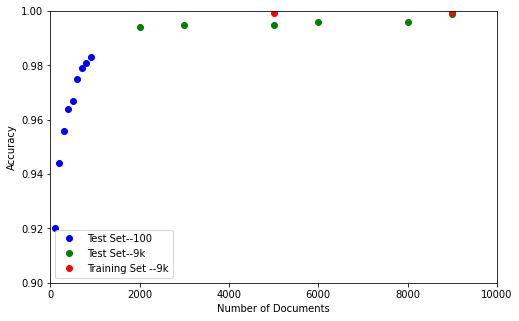

In [40]:
import matplotlib.pyplot as plt
#TODO add training perf
#plt.plot(test_doc_count, test_perf, 'ro')
# manual plotting on large dataset 5000-9000 that takes more resource and time to run
plt.figure(figsize=(8,5))
plt.plot([100,200,300,400,500,600,700,800,900],[0.920,0.944,0.956,0.964,0.967,0.975,0.979,0.981,0.983], 'bo')
plt.plot([2000,3000,5000,6000,8000,9000], [0.994,0.995,0.995,0.996,0.996,0.999], 'go')
plt.plot([5000,9000], [0.9994,0.9998], 'ro')

plt.axis([0, 10000, 0.90, 1.00])
plt.ylabel('Accuracy')
plt.xlabel('Number of Documents')
plt.legend(["Test Set--100",'Test Set--9k', 'Training Set --9k'], loc='best')
plt.show()

### Predict the test set and look at performance

In [41]:
import pickle
#filename = 'sklearn_crf_model_100-100i.sav'
#filename = 'sklearn_crf_model_9k-50i.sav'
#filename = 'sklearn_crf_model_100-100i.sav'
filename = 'sklearn_crf_model_10k-100i.sav'

# save model to disk for further run
pickle.dump(crf, open(filename, 'wb'))
print("File:", filename)

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print("Train set num sentences:", len(y_train))
print("Performance on training set:", result)

result = loaded_model.score(X_test, y_test)
print("Test set num sentences:", len(y_test))
print("Performance on test set:", result)


#y_predict = loaded_model.predict(X_test)
#print("x_test[0]", X_test[0])
#print("y_predict[0]", y_predict[0])

#File: sklearn_crf_model_100-100i.sav --optimized param
#Performance on training set: 0.9997040369361904
#Performance on test set: 0.9783544382758406
#NOTE perf is lower 0.9819 

#File: sklearn_crf_model_100-100i.sav -- with text corrections
#Performance on training set: 0.9996959978111842
#Performance on test set: 0.979850704383454

#File: sklearn_crf_model_8k-50i.sav -- 08-05-2019
#Performance on training set: 0.9992224760896037
#Performance on test set: 0.9961086516225393

#With new 10K docs -- full 10k training on 20% test split 10/22/2019
#Train set num sentences: 58324
#Performance on training set: 0.9997693866559333
#Test set num sentences: 14581
#Performance on test set: 0.9974465107523913

#File: sklearn_crf_model_100-100i.sav -- old c1,c2
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.982883439025759

#File: sklearn_crf_model_100-100i.sav
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.9839497165946461

File: sklearn_crf_model_10k-100i.sav
Train set num sentences: 16084
Performance on training set: 0.9998329411018863
Test set num sentences: 4022
Performance on test set: 0.9945833504963546


In [42]:
t = "ចំណែកជើងទី២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
pred = loaded_model.predict([features])
print("features:", features[0:2])
print("\npredict seg:", pred )

separator = "-"
tkcc = []
for k in features:
  tkcc.append(k['kcc'])
print("kcc:", tkcc)
complete = ""
for i, p in enumerate(pred[0]):
    if p == "1":
      complete += separator + tkcc[i]
    else:
      complete += tkcc[i]
complete = complete.strip(separator)
complete = complete.replace(separator+" "+separator, " ")
print("segment:", complete)
print("correct:", t_correct)

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}]

predict seg: [['1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1']]
kcc: ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២', 

In [43]:
# output predicted -- give a string to be split by newline and sentences
def segment_text(str, spacer=" "):
  complete = ""
  for sen in str.split('\n'):
    if sen.strip() == "": continue
    sen = sen.replace(u' ','')
    kccs = seg_kcc(sen)
    features=create_kcc_features(kccs)
    # predicts take list of sentences features
    prediction = crf.predict([features])
  
    #print("-len kccs:", len(kccs), " data 13:", kccs[:13])
    #print("-len feature:", len(features), " data 3:", features[:3])
    #print("-len prediction:", len(prediction), "data[0]:", prediction[0])

    for i, p in enumerate(prediction[0]):
        if p == "1":
            complete += spacer + kccs[i]
        else:
            complete += kccs[i]
    complete += "\n"
  complete = complete.replace(spacer+" ", " ").replace(" "+spacer, " ") # no 200b before or after space
  return complete[:-1]

print("seg:", segment_text("ចំណែកជើងទី២ \n\n\nនឹងត្រូវធ្វើឡើង\n\nឯប្រទេសកាតា៕"))

seg:  ចំណែក ជើង ទី ២
 នឹង ត្រូវ ធ្វើ ឡើង
 ឯ ប្រទេស កាតា ៕


In [44]:
t_orig = """សេតវិមាន​ទាត់ចោល​កិច្ចសហការ​ក្នុង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លើ​លោក​ត្រាំ

​សេតវិមាន​ដ៏​រឹងរូស​បាន​ប្រកាស​សង្គ្រាម​កាលពី​ថ្ងៃអង្គារ​ទី ៨ តុលា​ប្រឆាំង​នឹង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លោក​ដូណាល់ ​ត្រាំ ​ដោយ​ពន្លះ​ដំណើរការ​នេះ​ថា​ ​បក្សពួក​និយម ​ខុស​ច្បាប់​ ​និង​ ​ផ្ទុយ​រដ្ឋធម្មនុញ្ញ ​ហើយ​និយាយ​ថា​ទាំង​ប្រធានាធិបតី​និង​រដ្ឋបាល​របស់​គាត់​នឹង​មិន​សហការ​ទេ​នៅក្នុង​លិខិត​ពោរពេញ​ដោយ​កំហឹង​ ​សេតវិមាន​បាន​វាយ​សំពង​ទៅលើ​ប្រធាន​សភា​លោកស្រី​ណាន់​ស៊ី ​ផេឡូស៊ី ​និង​ ​ប្រធាន​គណៈកម្មាធិការ​សភា​ចំនួន​ ៣ ​ដែល​ដឹកនាំ​ការស៊ើបអង្កេត​នេះ​ ​ដោយ​ជំរុញ​ពួកគេ​ឱ្យ​បន្ត​ប្រឹងប្រែង​បណ្តេញ​លោក​ត្រាំតទៅទៀត​ចុះ​ ​ទោះបី​គ្មាន​កិច្ចសហប្រតិបត្តិការ​នា​ពេល​អនាគត​ក៏ដោយ​។

​ទីប្រឹក្សា​សេតវិមាន​លោក​ផាត់ ​ស៊ី​បូល​ឡូន ​បាន​សរសេរ​នៅក្នុង​លិខិត​កម្រាស់​ ៨ ​ទំព័រ​ថា​ “​និយាយ​ឱ្យ​ចំ​ទៅ​ ​អ្នក​កំពុង​ស្វះស្វែង​បដិសេធ​លទ្ធផល​នៃ​ការបោះឆ្នោត​ឆ្នាំ​ ២០១៦ ​និង​ដកហូត​សិទ្ធិ​របស់​ពលរដ្ឋ​អាម៉េរិក​ក្នុង​ការបោះឆ្នោត​ជ្រើសរើស​ប្រធានាធិបតី​ដោយ​សេរី​”​។

​ទាក់ទិន​នឹង​ការស៊ើបអង្កេត​ដែល​កំពុង​ធ្វើឡើង​ដើម្បី​រកមើល​ថា​តើ​លោក​ត្រាំ​បាន​រំលោភ​ការិយាល័យ​របស់​លោក​ដោយ​ស្វែងរក​ការស៊ើបអង្កេត​អំពី​អំពើពុករលួយ​នៅ​អ៊ុយក្រែន​លើ​គូ​ប្រជែង​របស់​លោក​គឺ​លោក​ ​ចូ ​បាយ​ដិន ​ឬ​អត់​នោះ​ លោក​ស៊ីបូល​ឡូន​និយាយ​ថា​ “​ការស៊ើបអង្កេត​របស់​អ្នកឯង​ខ្វះ​មូលដ្ឋាន​រដ្ឋធម្មនុញ្ញ​ស្រប​ច្បាប់​ ​ខ្វះ​អំណះអំណាង​យុត្តិធម៌​ ​និង​សូម្បី​ខ្វះ​នូវ​ភស្តុតាង​គោលបំផុត​ក្នុង​ដំណើរការ​ស៊ើបអង្កេត​នេះ​។

 ​ប្រធានាធិបតី​ត្រាំ​មិន​អាច​អនុញ្ញាតឱ្យ​រដ្ឋបាល​គាត់​ចូលរួម​ក្នុង​ការស៊ើបអង្កេត​ប្រកាន់​បក្ខពួក​នេះ​នៅក្រោម​កាលៈទេសៈ​ដូច្នេះ​ទេ​”​។

 ​លោកស្រី​ផេឡូស៊ី​បាន​វាយ​បក​វិញ​ ​ដោយ​ហៅ​លិខិត​នោះ​ថា​ “​ខុស​ទាំង​ដុល​” ​និង​ពណ៌នាវា​ថា​ជា​ “​ការប៉ុនប៉ង​ខុស​ច្បាប់​មួយ​ទៀត​ដើម្បី​លាក់បាំង​ការពិត​”​។

 ​លោកស្រី​និយាយ​ថា​ ​“​ប្រធានាធិបតី​ត្រាំ ​លោក​ឯង​មិន​អាច​នៅ​ពីលើ​ច្បាប់​បាន​ទេ​។

 ​លោក​ឯង​នឹង​ត្រូវ​ចាប់​ឱ្យ​ទទួលខុសត្រូវ​”​។

 ​លោកស្រី​បាន​ព្រមាន​ថា​ “​ការបន្ត​ប្រឹងប្រែង​លាក់បាំង​ការពិត​នៃ​ការរំលោភ​អំណាច​របស់​ប្រធានាធិបតី​ពី​ប្រជាជន​នឹង​ត្រូវ​ចាត់ទុក​ជា​ភស្តុតាង​បន្ថែម​ទៀត​នៃ​ការធ្វើឱ្យ​ស្ទះ​ដល់​ការអនុវត្ត​ច្បាប់​”​៕

 ​ដោយ​៖​ ​កញ្ញា​ដាលី​ស"""
t=t_orig.replace(" ","")
seg = segment_text(t,"\u2022")
print("seg:", seg.replace("  "," "))
print("orig:", t_orig.replace(" ", "\u2022").replace("\n\n","\n"))

seg: •សេត•វិមាន•​•ទាត់•ចោល•​•កិច្ច•សហ•ការ•​•ក្នុង•​•ការ•ស៊ើប•អង្កេត•​•ដើម្បី•​•ចោទ•ប្រកាន់•​•លើ•​•លោក•​•ត្រាំ
•​•សេត•វិមាន•​•ដ៏•​•រឹង•រូស•​•បាន•​•ប្រកាស•​•សង្គ្រាម•​•កាល•ពី•​•ថ្ងៃ•អង្គារ•​•ទី•៨•តុលា•​•ប្រឆាំង•​•នឹង•​•ការ•ស៊ើប•អង្កេត•​•ដើម្បី•​•ចោទ•ប្រកាន់•​•លោក•​ដូណាល់•​•ត្រាំ•​•ដោយ•​•ពន្លះ•​•ដំណើរ•ការ•​•នេះ•​•ថា•​​•បក្ស•ពួក•​•និយម•​•ខុស•​•ច្បាប់•​​•និង•​​•ផ្ទុយ•​•រដ្ឋ•ធម្មនុញ្ញ•​•ហើយ•​•និយាយ•​•ថា•​•ទាំង•​•ប្រធានាធិបតី•​•និង•​•រដ្ឋ•បាល•​•របស់•​•គាត់•​•នឹង•​•មិន•​•សហ•ការ•​•ទេ•​•នៅ•ក្នុង•​•លិខិត•​•ពោរ•ពេញ•​•ដោយ•​•កំហឹង•​​•សេត•វិមាន•​•បាន•​•វាយ•​•សំពង•​•ទៅ•លើ•​•ប្រធាន•​•សភា•​•លោក•ស្រី•​ណាន់•​ស៊ី•​•ផេឡូស៊ី•​•និង•​​•ប្រធាន•​•គណៈកម្មាធិការ•​•សភា•​•ចំនួន•​•៣•​•ដែល•​•ដឹក•នាំ•​•ការ•ស៊ើប•អង្កេត•​•នេះ•​​•ដោយ•​•ជំរុញ•​•ពួក•គេ•​•ឱ្យ•​•បន្ត•​•ប្រឹងប្រែង•​•បណ្តេញ•​•លោក•​•ត្រាំត•ទៅ•ទៀត•​•ចុះ•​​•ទោះបី•​•គ្មាន•​•កិច្ច•សហ•ប្រតិបត្តិ•ការ•​នា•​•ពេល•​•អនាគត•​•ក៏•ដោយ•​•។
•​•ទី•ប្រឹក្សា•​សេត•វិមាន•​•លោក•​•ផាត់•​ស៊ី•​•បូល•​•ឡូន•​•បាន•​•សរសេរ•​•នៅ•ក្នុង•​•លិខិត•​•កម្រាស់•​•៨•​•ទំព័រ•​•ថា•​“​•និយាយ•​•ឱ្យ•​•ចំ​•ទ

### Result on different sizes and parameters

<pre>
# Performance on 100 docs -- try different parameters
#Performance on training set: 0.9997610717638024
#Performance on test set: 0.9721994535519126
# Increase iteration to 200 -- didn't help (training set already got close to 1.0)
#Performance on training set: 0.9997799966153326
#Performance on test set: 0.9779427359490986
# 100 iteration
#Performance on training set: 0.9998124882805175
#Performance on test set: 0.9768734559429042
# 50 iteration
#Performance on training set: 0.9998124882805175
#Performance on test set: 0.978040076859731
# iter:100 with c1:0.1 c2:0.1
#Performance on training set: 0.9997929606625259
#Performance on test set: 0.9800327332242226
# iter: 100: c1:0.1 c2.0.01
#Performance on training set: 0.9998102139406487
#Performance on test set: 0.9814729950900164
# iter: 100 c1:0.015 c2:0.0037 -- using the grid search below
#Performance on training set: 0.9998102139406487
#Performance on test set: 0.9819312602291326

#### for 5K articles == 50 itertaion
#Performance on training set: 0.9992818143571441
#Performance on test set: 0.9954152978132683
# 8K article, 77736 sentences model 98MB
#Performance on training set: 0.9990976674399077
#Performance on test set: 0.996076182286788
#9K 50 iteration --125MB -- after train 20GB
#Performance on training set: 0.9989628599520689
#Performance on test set: 0.9960639776208017
#9k 75 iteration--52MB
#Performance on training set: 0.9993083406544416
#Performance on test set: 0.9962459620036132
#9k 100 iteration--41MB
#Performance on training set: 0.9993263126303732
#Performance on test set: 0.9963247521770143
# 5k kcc 100 iteration to compare to char mem used 11MB vs 20MB
#Performance on training set: 0.999446032688189
#Performance on test set: 0.99588756247573
</pre>

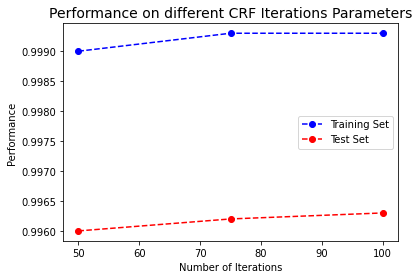

In [45]:
#@title Performance on Different CRF Iteration Parameters
# Performance with different iteration number on 9K articles count
from matplotlib.pylab import plt #load plot library
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot([50,75,100], [0.9990,0.9993,0.9993], "--b",marker='o', label="Training Set")
plt.plot([50,75,100], [0.9960,0.9962,0.9963], "--r",marker='o', label="Test Set")
plt.ylabel('Performance')
plt.xlabel('Number of Iterations')
plt.legend(["Training Set",'Test Set'], loc='best')
plt.title("Performance on different CRF Iterations Parameters", fontsize=14)
plt.show()


### Model file sizes

In [46]:
print("Used seg_text:", len(seg_text))
print("total data:", len(X), len(y))
print("number of sentences:", len(sentences))
!ls -alh *model*

# Look at the model output size per number of document (iteration affect the size)
#-rw-r--r-- 1 root root 126M Jul 22 00:23 sklearn_crf_model_9k-50i.sav
#-rw-r--r-- 1 root root  52M Jul 21 23:51 sklearn_crf_model_9k-75i.sav
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
# Doc size obviously affect the model size
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
#-rw-r--r-- 1 root root  23M Jul 23 04:10 sklearn_crf_model_5k-100i.sav
#-rw-r--r-- 1 root root 2.7M Jul 22 19:54 sklearn_crf_model_100-100i.sav

Used seg_text: 101
total data: 20106 20106
number of sentences: 20106
-rw------- 1 root root  10M Dec 11 03:13 crf.model
-rw------- 1 root root 6.8M Dec 11 03:14 sklearn_crf_model_10k-100i.sav


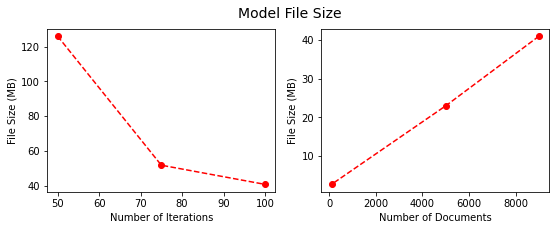

In [47]:
#@title Model File Size Chart
%matplotlib inline
iterations = [50,75,100]
iteration_fsize = [126,52,41]
doc_sizes = [9000,5000,100]
doc_fsizes = [41,23,2.7]
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

axs[0].plot(iterations, iteration_fsize, "--r",marker='o')
axs[0].set_xlabel('Number of Iterations')
axs[0].set_ylabel('File Size (MB)')
axs[1].plot(doc_sizes, doc_fsizes, "--r",marker='o')
axs[1].set_ylabel('File Size (MB)')
axs[1].set_xlabel('Number of Documents')
fig.suptitle('Model File Size', fontsize=14)
plt.show()

### Hyper parameter tuning

#### Randomized Search

In [48]:
%%time
# use RandomizedSearch with F1 score
#import nltk
#import sklearn
import scipy.stats

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

# define fixed parameters and parameters to search
def run_randomize_search():
  crf = sklearn_crfsuite.CRF(
      algorithm='lbfgs',
      max_iterations=100,
      all_possible_transitions=True
  )
  params_space = {
      'c1': scipy.stats.expon(scale=0.5),
      'c2': scipy.stats.expon(scale=0.05),
  }

  #clabels = list(crf.classes_)
  clabels = ['1', '0']

  # use the same metric for evaluation
  f1_scorer = make_scorer(metrics.flat_f1_score,
                          average='weighted', labels=clabels)

  # search
  rs = RandomizedSearchCV(crf, params_space,
                          cv=3,
                          verbose=1,
                          n_jobs=-1,
                          n_iter=50,
                          scoring=f1_scorer)
  rs.fit(X_train, y_train)
  return rs

# Fitting 3 folds for each of 50 candidates, totalling 150 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
# [Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 32.0min finished
# CPU times: user 31min 42s, sys: 17.5 s, total: 32min
# Wall time: 32min 16s

CPU times: user 0 ns, sys: 38 µs, total: 38 µs
Wall time: 40.3 µs


In [49]:
#uncomment me to run randomize search
rs=run_randomize_search()

crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

import pandas as pd
print('grid score:', rs.cv_results_)
dfrs = pd.DataFrame(rs.cv_results_)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs.drop("params", axis=1, inplace=True)

print(dfrs.head())
print(dfrs.info())

# for p in dfrs["param_c1"]:
#   print ("P:",p, type(p))

# for s in rs.cv_results_.keys():
#   print('rs cv_results key:', s)
#   print('rs cv_results:', rs.cv_results_[s])
  
#best params: {'c1': 0.13787813729888343, 'c2': 0.01439440358969233}
#best CV score: 0.971210607745938
#model size: 1.73M
# 50 plot 
#best params: {'c1': 0.014907906173550766, 'c2': 0.0037402642391942613}
#best CV score: 0.9699000433318031
#model size: 3.08M

# 100_200b model - 10/27/2019
#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#best CV score: 0.9789616724105187
#model size: 1.63M

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 107.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 377.3min finished


best params: {'c1': 0.005574867433247848, 'c2': 0.0031335390843687527}
best CV score: 0.9939827626616028
model size: 16.31M
grid score: {'mean_fit_time': array([130.28174146, 130.70183221, 132.32177051, 134.76979431,
       132.69937015, 135.17806578, 132.22089005, 134.80767576,
       133.9719429 , 130.80486774, 137.56048783, 133.66681393,
       130.66964388, 137.06559197, 132.72851666, 134.22583803,
       131.25202449, 138.88165847, 130.29443248, 133.2520051 ,
       134.68296393, 132.31790646, 131.83748762, 134.09816329,
       136.8217779 , 131.28750086, 136.11560782, 129.78324191,
       134.67320609, 134.52772053, 134.98739616, 134.79233464,
       134.32932512, 131.70880294, 137.05090292, 134.7126766 ,
       134.84157348, 130.96234345, 137.16326626, 135.43393183,
       132.04820307, 135.28056296, 134.51145116, 135.53327171,
       134.18697468, 130.94088523, 136.34892631, 129.9413027 ,
       135.80150334, 132.87165181]), 'std_fit_time': array([4.45164585, 1.00661366, 3.3165

Dark blue => 0.992, dark red => 0.994


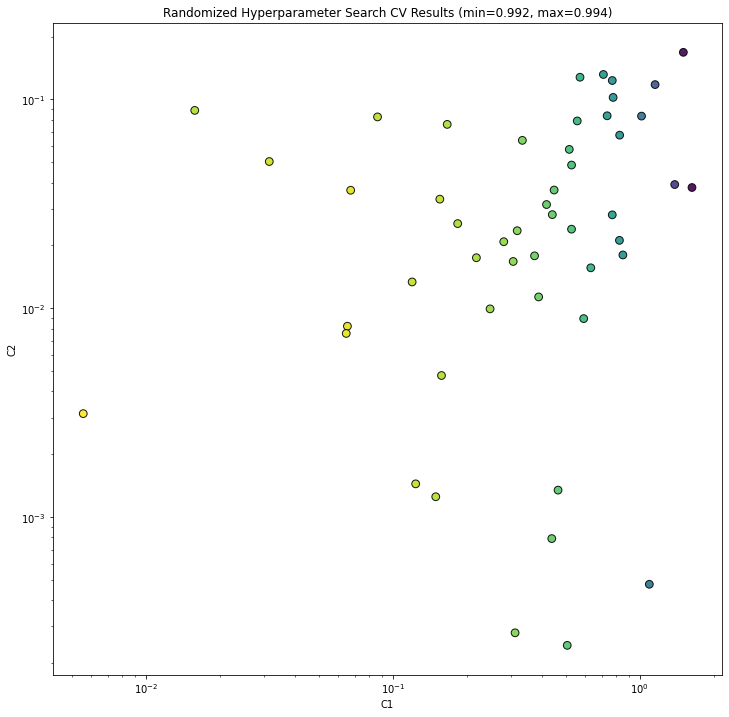

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

_x = dfrs["param_c1"] #[s.parameters['c1'] for s in rs.cv_results_]
_y = dfrs["param_c2"] #[s.parameters['c2'] for s in rs.cv_results_]
_c = dfrs["mean_test_score"] #[s.mean_validation_score for s in rs.cv_results_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

#ax.legend("o", _c)
ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

#### Grid Search

In [51]:
# setup grid search method
from sklearn.model_selection import GridSearchCV
from time import time
def run_grid_search():
  parameters = {
      'c1': [0.001, 0.01, 0.1],
      'c2': [0.001, 0.01, 0.1],
  }
  # run grid search
  grid_search = GridSearchCV(crf, param_grid=parameters, cv=3, iid=False, scoring=f1_scorer)
  start = time()
  grid_search.fit(X, y)

  print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
        % (time() - start, len(grid_search.cv_results_['params'])))
  return grid_search

In [52]:
# grid search results
import numpy as np
#grid_search.cv_results_
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# uncomment me out to run grid search
#gs = run_grid_search()            
#report(gs.cv_results_)

## Result and Evaluation

Edit distance vs accuracy by word
Accuracy by character vs word




### Performance Result

In [53]:
#type(crf)
crf = loaded_model
y_train_predict = crf.predict(X_train)
y_predict = crf.predict(X_test)

In [54]:
#@title Metric methods 
def editDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

#print("test training performance...", datetime.now())

def count_correct_word(correctstr, predictionstr):
  #print("prediction:", prediction)
  #print("   correct:", correct)
  correct = [int(c) for c in correctstr]
  prediction = [int(p) for p in predictionstr]
  B=False
  correct_count = 0
  for i,c in enumerate(correct):
    p = prediction[i]
    nextc = -1
    if i < len(correct)-1: 
      nextc = correct[i+1]
    if c==1 and p==1:
      B = True
      correct_count += 1
      #print(i,"Begin word corect", correct_count)
    if p==0 and c==1 and B:
      B = False
      correct_count -= 1
      #print(i, "too long")
    if c==0 and p==1: #incorrect
      if B: 
        correct_count -= 1
        #print(i,"bad word", correct_count)
        B = False
  return correct_count

In [55]:
def calc_performance(corrects, predictions): # list of 0/1
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_word = 0
  n_correct_word = 0
  
  print("size of input:", len(predictions), "ground truth:", len(corrects))
  if len(predictions) != len(corrects): return 0
  
  for i, prediction in enumerate(predictions):
    correct = corrects[i]
    zipped = list(zip(prediction, correct))    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])

    total_word += len([_ for l in correct if l=="1"])
    total_char += len(prediction)
    n_correct_word += count_correct_word(correct, prediction)
  
  print("Total char:", str(total_char), " total word:", str(total_word), "avg char/word:", str(total_char/total_word))
  print("Correct word:" + str(n_correct_word), " incorrect word:", str(total_word - n_correct_word), "word accuracy:", n_correct_word/total_word) 
  
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  F1 = 2 * (precision * recall) / (precision + recall)
  print("Precision:\t" + str(precision), "tp:", tp, "fp:", fp)
  print("Recall:\t\t" + str(recall), "fn:",fn)
  print("F1-score:\t" + str(F1))
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) 

print("Train set:======")
calc_performance(y_train, y_train_predict)
print("Test set:======")
calc_performance(y_test, y_predict)

# 8K, 50 iteration
# size of input: 14995 ground truth: 14995
# Total char: 1267427  total word: 549151 avg char/word: 2.3079754020296783
# Correct word:541922  incorrect word: 7229 word accuracy: 0.9868360432740721
# Precision:	0.9957983422948048 tp: 546525 fp: 2306
# Recall:		0.9952180729890322 fn: 2626
# F1-score:	0.995508123083985
# Accuracy:	0.9961086516225393

# 9K, 50 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603368  incorrect word: 8062 word accuracy: 0.9868145167885122
# Precision:	0.9962516150479069 tp: 608374 fp: 2289
# Recall:		0.995001880836727 fn: 3056
# F1-score:	0.9956263557683417
# Accuracy:	0.9962204325748506

## 9K, 100 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603921  incorrect word: 7509 word accuracy: 0.9877189539276777
# Precision:	0.9962533268297155 tp: 608653 fp: 2289
# Recall:		0.9954581881818033 fn: 2777
# F1-score:	0.9958555987866214
# Accuracy:	0.9964177196303449

#2k
# size of input: 65431 ground truth: 65431
# Total char: 5501263  total word: 2375882 avg char/word: 2.3154613739234526
# Correct word:2328188  incorrect word: 47694 word accuracy: 0.9799257707243036
# Precision:	0.9931317368571949 tp: 2358959 fp: 16314
# Recall:		0.9928771715093595 fn: 16923
# F1-score:	0.9930044378682658
# Accuracy:	0.9939582964857343

#3k
# size of input: 56203 ground truth: 56203
# Total char: 4721570  total word: 2036734 avg char/word: 2.3182065011925954
# Correct word:2001871  incorrect word: 34863 word accuracy: 0.9828828899601028
# Precision:	0.9941444595803693 tp: 2024438 fp: 11924
# Recall:		0.9939628837148101 fn: 12296
# F1-score:	0.9940536633558356
# Accuracy:	0.9948703503283866

#6k #to copy below X 55k,28k
# size of input: 28521 ground truth: 28521
# Total char: 2395497  total word: 1033089 avg char/word: 2.3187711804113684
# Correct word:1019364  incorrect word: 13725 word accuracy: 0.9867146005813633
# Precision:	0.9959204907423912 tp: 1028021 fp: 4211
# Recall:		0.9950943239159453 fn: 5068
# F1-score:	0.9955072359211957
# Accuracy:	0.9961264823124387

Train set:======
size of input: 16084 ground truth: 16084
Total char: 1167253  total word: 572154 avg char/word: 2.040102839445324
Correct word:571893  incorrect word: 261 word accuracy: 0.9995438291089462
Precision:	0.9997780546754443 tp: 572086 fp: 127
Recall:		0.9998811508789591 fn: 68
F1-score:	0.999829600119542
Accuracy:	0.9998329411018863
Test set:======
size of input: 4022 ground truth: 4022
Total char: 291324  total word: 142859 avg char/word: 2.0392414898606317
Correct word:140749  incorrect word: 2110 word accuracy: 0.985230192007504
Precision:	0.9946155623551488 tp: 142050 fp: 769
Recall:		0.9943370736180429 fn: 809
F1-score:	0.9944762984899082
Accuracy:	0.9945833504963546


In [56]:
flat_predicts = [item for t in y_predict for item in t]
flat_true = [item for t in y_test for item in t]
from sklearn.metrics import classification_report 
print(classification_report(flat_predicts, flat_true, 
      target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    148505
           1       0.99      0.99      0.99    142819

    accuracy                           0.99    291324
   macro avg       0.99      0.99      0.99    291324
weighted avg       0.99      0.99      0.99    291324



### Detail performance of specific test set

In [58]:
from datetime import datetime

# Test performance on training set
def test_performance(sentences):
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_kcc = 0
  total_word = 0
  n_correct_word = 0
  n_incorrect_word = 0
  n_edit = 0
  
  print("size of input:", len(sentences))
  for sen in sentences:
    #print("size of s:", len(s)) #testing validation set
    sen_orig = sen
    
    #sen = sen.replace(" ","") # remove spaces
    #kccs = seg_kcc(sen)
    total_char += len(sen)
    
    
    
    kccs_label = gen_kcc_with_label(sen_orig)
    # get kccs without label
    kccs = [kl[0] for kl in kccs_label]
    total_kcc += len(kccs)
    
    # predict using pycrfsuite
    #prediction = tagger.tag(create_kcc_features(kccs))
    
    # predict using sklearn_crf
    preds = loaded_model.predict([create_kcc_features(kccs)])
    prediction = preds[0]
    correct = create_labels_from_kccs(kccs_label)
    
    zipped = list(zip(prediction, correct))
    #print("len kccs_label", len(kccs_label), " pred:", kccs_label)
    #print("len correct", len(correct), " pred:", correct)
    #print("len predict", len(prediction), " pred:", prediction)
    #print("len sen_orig", len(sen_orig), " pred:", sen_orig)
    
    #print("len zipped", len(zipped), zipped)
    #print("seg:", segment_kcc_phrase(sen.replace(" ","")))
    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])
    #n_correct_word += len([1 for l,c in zipped if l=='1' and c=='1']) 
    n_correct_word += count_correct_word(correct, prediction)
    n_incorrect_word += len([1 for l,c in zipped if l=='0' and c=='1'])
    #total_word += len([1 for l in correct if l=='1'])
    total_word += len([_ for l in correct if l=='1'])
    n_edit += editDistance(prediction,correct)
    #print("len correct", len(correct), " incorrect count:", n_incorrect)
  print("Total char:", str(total_char)," kcc:", str(total_kcc), " total word:", str(total_word))
  print("avg char/kcc:", str(total_char/total_kcc)," avg char/word:", str(total_char/total_word)," avg kcc/word:", str(total_kcc/total_word))
  print("correct kcc:" + str(n_correct), " incorrect kcc:", str(n_incorrect), " kcc accuracy:", n_correct/total_kcc)
  print("correct word:" + str(n_correct_word), " missed word:", str(n_incorrect_word), "word accuracy:", n_correct_word/total_word) #10: 0.98, 100:0.981
  print("n_edit:", n_edit, "/", total_word, " pct edit/kcc:", (n_edit/total_kcc), " acc:", 1.0-(n_edit/total_kcc)) #10 0.98 100:0.99

  print("Precision:\t" + str(tp/(tp+fp))) # 10: 0.96, 100: 0.979
  print("Recall:\t\t" + str(tp/(tp+fn))) # 10: 0.98, 100: 0.981
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) # 10 article 0.986, 100:0.991
  
"""
avg char/kcc: 1.8177994491178442  avg char/word: 4.701742562818908  avg kcc/word: 2.586502358717628
correct kcc:24793  incorrect kcc: 2073
correct word:9314  missed word: 1039 word accuracy: 0.8966977953210744
n_edit: 85 / 10387  pct edit/word: 0.008183306055646482  acc: 0.9918166939443536
Precision:	0.9000773096250483
Recall:		0.8996426156669565
Accuracy:	0.9228392764088439
"""

# only use for big dataset which set aside the test set
print("Performance on training set: ================ ")
test_performance(sentences[:500]) # not same test split data -- since test split is all random
print("Performance on test set: ================ ")
test_performance(sentences[500:]) # not the same test split data -- may used in training -- BOGUS

Performance on training set: ================ 
size of input: 500
Total char: 89671  kcc: 37088  total word: 18386
avg char/kcc: 2.417790120793788  avg char/word: 4.87713477646035  avg kcc/word: 2.017186990101164
correct kcc:37050  incorrect kcc: 38  kcc accuracy: 0.9989754098360656
correct word:18336  missed word: 18 word accuracy: 0.9972805395409551
n_edit: 37 / 18386  pct edit/kcc: 0.0009976272648835203  acc: 0.9990023727351165
Precision:	0.9989123341309549
Recall:		0.9990209942347438
Accuracy:	0.9989754098360656
Performance on test set: ================ 
size of input: 19606
Total char: 3419402  kcc: 1421489  total word: 696627
avg char/kcc: 2.4055071829609656  avg char/word: 4.908512015755921  avg kcc/word: 2.0405310158808083
correct kcc:1419754  incorrect kcc: 1735  kcc accuracy: 0.9987794488736811
correct word:694306  missed word: 859 word accuracy: 0.9966682313490577
n_edit: 1715 / 696627  pct edit/kcc: 0.0012064813727014419  acc: 0.9987935186272986
Precision:	0.998742542819575

In [ ]:
cpred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']
ppred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']


### Compare Performance on CRF Both Libraries (pycrfsuite and sklearn crfsuite)
The output looks identical between the two libraries.

In [59]:
# using pycrfsuite
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')

y_train_pred = [tagger.tag(xseq) for xseq in X_train]
print("X_train[0]", X_train[0])
print("y_train_pred[0]", y_train_pred[0])
print("y_train[0]     ", y_train[0])

y_pred = [tagger.tag(xseq) for xseq in X_test]
print("len y_pred:", len(y_pred))
print("X_test[0]", X_test[0])
print("len y_pred[0]", len(y_pred[0]), y_pred[0])
print("y_test[0]", y_test[0])

X_train[0] [{'kcc': 'គឺ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'វា', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'គឺវា', 'ns+1': False, 'kcc[+2]': 'ពុ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'វាពុ', 'kcc[0:+2]': 'គឺវាពុ', 'ns+2': False, 'kcc[+3]': 'ក', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ពុក', 'kcc[+1:+3]': 'វាពុក', 'kcc[0:+3]': 'គឺវាពុក'}, {'kcc': 'វា', 't': 'K2', 'ns': False, 'kcc[-1]': 'គឺ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'គឺវា', 'ns-1': False, 'kcc[+1]': 'ពុ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'វាពុ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ពុក', 'kcc[0:+2]': 'វាពុក', 'ns+2': False, 'kcc[+3]': 'រ', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ករ', 'kcc[+1:+3]': 'ពុករ', 'kcc[0:+3]': 'វាពុករ'}, {'kcc': 'ពុ', 't': 'K2', 'ns': False, 'kcc[-1]': 'វា', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'វាពុ', 'ns-1': False, 'kcc[-2]': 'គឺ', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'គឺវា', 'kcc[-2:0]': 'គឺវាពុ', 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ពុក', 'ns+1': False, 'kcc[+2]': 'រ', 'kcc[+2]t': 'C', 'kcc[+1:+

In [60]:
# using sklearn
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_train_pred_sk = loaded_model.predict(X_train)
y_test_pred_sk  = loaded_model.predict(X_test)
print("test_pred", len(y_test_pred_sk))
print(len(y_test_pred_sk[0]), y_test_pred_sk[0])
print("test_pred", len(y_pred))
print(len(y_pred[0]), y_pred[0])

test_pred 4022
46 ['1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1']
test_pred 4022
46 ['1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1']


In [61]:
# metric
import numpy as np
from sklearn.metrics import classification_report

print("=== Training set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_train for item in l_sen])
preds  = np.array([item for l_sen in y_train_pred for item in l_sen])
preds2  = np.array([item for l_sen in y_train_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds2:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))

print("=== Test set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_test for item in l_sen])
preds  = np.array([item for l_sen in y_pred for item in l_sen])
preds2 = np.array([item for l_sen in y_test_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))


=== Training set performance === 
 truths: 1167253 ['1' '1' '1' ... '1' '0' '1']
 preds: 1167253 ['1' '1' '1' ... '1' '0' '1']
 preds2: 1167253 ['1' '1' '1' ... '1' '0' '1']
- using pycrfsuite
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    595099
           1       1.00      1.00      1.00    572154

    accuracy                           1.00   1167253
   macro avg       1.00      1.00      1.00   1167253
weighted avg       1.00      1.00      1.00   1167253

- using sklearn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    595099
           1       1.00      1.00      1.00    572154

    accuracy                           1.00   1167253
   macro avg       1.00      1.00      1.00   1167253
weighted avg       1.00      1.00      1.00   1167253

=== Test set performance === 
 truths: 291324 ['1' '1' '0' ... '1' '0' '1']
 preds: 291324 ['1' '1' '0' ... '1' '0' '1']
 preds: 291324 [

## Analysis

We did some write up analysis on the Blog post that you can see.
https://medium.com/@phylypo/segmentation-of-khmer-text-using-conditional-random-fields-3a2d4d73956a

### Test sample data

In [62]:
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
print("features:", features)
print("\npredict seg:", crf.predict([features]))

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}, {'kcc': 'ក', 't': 'C', 'ns': False, 'kcc[-1]': 'ណែ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ណែក', 'ns-1': False, 'kcc[-2]': 'ចំ', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'ចំណែ', '

In [63]:
# Create KCC using phrase, but pass in the whole sentence to CRF
def segment_kcc_phrase(sentence):
  complete = ""
  sentence = sentence.replace(u' ','')
  kccs = seg_kcc(sentence)

  #TODO should feed the whole sentence, not phrase, kcc already capture english spaces
  features = create_kcc_features(kccs)
  prediction = crf.predict([features])

  for i, p in enumerate(prediction[0]):
      if p == "1":
          complete += " " + kccs[i]
      else:
          complete += kccs[i]
  complete = complete.strip().replace("  "," ")
  complete = complete.strip().replace("  "," ")
  return complete
  
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
#featrues = create_kcc_features(skcc)
print(" seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត"
t_correct = "យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត "
print("\n seg:", segment_kcc_phrase(t).strip().replace('  ',' '))
print("corr:", t_correct)
t= 'ថ្ងៃ​ទី០២ ខែមករា ឆ្នាំ​២០១៤ '
t_correct = "ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "2019-07-12 03:39:34.540220"
t_correct = "2019-07-12 03:39:34.540220"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = 'តើអ្នកប្រាប់ខ្ញុំបានទេថាពេលណាត្រូវចុះពីឡានក្រុង ? '
t_correct = 'តើ អ្នក ប្រាប់ ខ្ញុំ បាន ទេ ថា ពេលណា ត្រូវ ចុះ ពី ឡានក្រុង ?'
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
 seg: ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើ ឡើង ឯ ប្រទេស កាតា ៕
corr: ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ 

 seg: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យ ដឹង ថា កាល ពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រ ភព អង់គ្លេស RoyalMarines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹប អូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើ ដំណើរ ទៅ កាន់ រោង ចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការ រឹប អូស ត្រូវ បាន គេ សំដៅ អនុវត្ត
corr: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត 

 seg: ថ្ងៃ ​ ទី ០២ ខែ មករា ឆ្នាំ ​ ២០១៤
corr: ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤

 seg: 2019-07-1203:39:34. 540220
corr: 2019-07-12 03:39:34.

### Searching text and fixing

In [64]:
#" ឡុង "=2 #"ឡុងដ៍" never seen
#នៅក្នុង=79, " ពេលណា"=0
#ធ្វើឡើងឯ
found = []
#s = "ខេង".strip()
s = "អ្នក".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
if (len(found)>0):
  print("sample sentence #0: %s" %(repr(found[0])))
  for sen in found:
    idx = sen.find(s)
    sidx = idx - 15 if idx>15 else 0
    eidx = idx + 15 if idx+15<len(sen) else len(sen)
    print("start idx:", sidx, eidx, "len:", len(sen))
    print("Found s:", repr(sen[sidx:eidx]))

# names to fix
t="""
ឡុង ប៊ុន ហោ
ឡុងដ៍
នៅក្នុង <= នៅ ក្នុង
រោង ចក្រចម្រាញ់ < រោងចក្រ ចម្រាញ់
ហុក ឡង ឌី -> ហុក ឡងឌី 
"""

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
start idx: 33 63 len: 225
Found s: '្រុងបាដាដ នៅពេលអ្នកបំផ្ទុះគ្រា'
start idx: 0 15 len: 150
Found s: 'អ្នកនាំពាក្យសន្'
start idx: 0 28 len: 323
Found s: 'កំណត់ត្រារបស់អ្នកយកព័ត៌មានដែ'
start idx: 25 55 len: 85
Found s: 'ាថាយ ខបផឺ ដែលជាអ្នកទំនាក់ទំនងទ'
start idx: 159 189 len: 237
Found s: '់ភ្នាក់ងារ CIA អ្នកកាសែតត្រូវត'
start idx: 179 209 len: 348
Found s: '់សុវត្ថិភាពរបស់អ្នកដទៃទៀតនៅក្ន'
start idx: 62 92 len: 99
Found s: '្តឹងឧទ្ធរណ៍របស់អ្នកកាសែតលើករណី'
start idx: 0 29 len: 174
Found s: 'ប៊េតធី រួមទាំងអ្នកស្រាវជ្រាវជ'
start idx: 92 122 len: 144
Found s: 'នគាត់ផ្ទាល់ជា "អ្នកបង្កើត" គ្រ'
start idx: 57 87 len: 205
Found s: 'យដែលអំពាវនាវដល់អ្នកវិទ្យាសាស្រ'
start idx: 104 134 len: 189
Found s: 'ឺរ៉ុបដើម្បីរំឮកអ្នកដែលបានស្លាប'
start idx: 0 15 len: 41
Found s: 'អ្នកនាំពាក់ CER'
start idx: 9 39 len: 148
Found s: 'ទេសស៊ូដង់ ក្រុមអ្នកទាមទារ ក្រុ'
start idx: 72 102 len: 264
Found s: 'ទាំងអស់ ក៏ដូចជាអ្នកដែលមានជំនឿល'
start idx: 11 41 len: 17

### Final Training on Full Dataset
After we satisfied with our approach, we can use the more dataset to train such as the 5K or 10K batch.

To do that just change the batch size for 100 to 10K to load 10,000 articles. Note that training will take longer and you will need at least 24GB of RAM.

In addition, once you don't need to measure the performance any more, you can train on the whole dataset (leaving 0% test set) so we have more training data to improve the model. Use this as your final model.



## Data distribution

### Categories

In [65]:
import pandas as pd
meta = pd.read_csv(data_dir + '/meta.txt')
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      101 non-null    int64 
 1   docId      101 non-null    int64 
 2   category   101 non-null    object
 3   charCount  101 non-null    int64 
 4   wordCount  101 non-null    int64 
 5   url        101 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.9+ KB


,index,docId,category,charCount,wordCount,url
0,1,311000,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
1,2,311001,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
2,3,311002,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
3,4,311003,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
4,5,311004,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061


In [66]:
from urllib.parse import urlparse
domain = []
for index, row in meta.iterrows():
  parsed_uri = urlparse(row.url)
  #domain.append('{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri))
  domain.append('{uri.netloc}'.format(uri=parsed_uri).replace("www.",""))
print(domain[0:3])
meta["domain"] = domain
meta.head()


['thmeythmey.com', 'thmeythmey.com', 'thmeythmey.com']


,index,docId,category,charCount,wordCount,url,domain
0,1,311000,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
1,2,311001,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
2,3,311002,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
3,4,311003,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
4,5,311004,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com


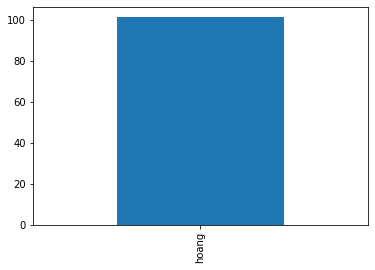

In [67]:
import matplotlib.pyplot as plt
#meta.hist()
cat = meta['category'][:800]
cat.head()
cat.value_counts().plot(kind='bar')
plt.show()

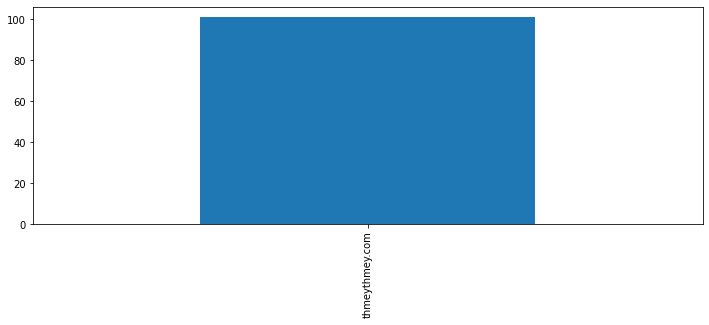

In [68]:
plt.figure(figsize=(12,4))
meta['domain'].value_counts().plot(kind='bar')
plt.show()

### Word Distribution

In [69]:
#Word size distribution
words = {}
word_count = 0
sentence_count = 0
wordspref = {} # first character key - list of words begin with a letter
wsize = [] # list of word size
for i, text in enumerate(seg_text):
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        sentence_count += 1
        for phrase in sentence.split():
          for word in phrase.split(' '):
            word_count += 1
            wsize.append(len(word))
            words[word] = 1 if word not in words.keys() else words[word] + 1
            pref = word[:1]
            if pref in wordspref:
              wlist = wordspref[pref]
              wlist.add(word)
              wordspref[pref] = wlist
            else: wordspref[pref] = set(word)
print("total number of articles:", len(seg_text))
print("total number of sentences:", sentence_count, " words:", word_count)
print("total number of distinct words:", len(words))
print("total number wordspref:", len(wordspref))

# for i, ws in enumerate(sorted(wordspref)):
#     s = wordspref[ws]
#     if i<10: print("key:", ws, "count:", len(s))

from collections import Counter
d = Counter(words)
print("Most frequent words:", d.most_common()[0:10])

# use first letter of the word to speed up lookup
def checkKeyPrefixExist(key):
  s = wordspref[key[0]]
  return key in s

print("test key exist: បាន ទ្បើង", checkKeyPrefixExist('បាន'), checkKeyPrefixExist('ទ្បើង'))
print('wlength:', len(wsize))


total number of articles: 101
total number of sentences: 20106  words: 715013
total number of distinct words: 25329
total number wordspref: 159
Most frequent words: [('បាន', 25353), ('។', 20022), ('ការ', 19639), ('នៅ', 15015), ('ដែល', 13036), ('ក្នុង', 10589), ('ជា', 10110), ('"', 9941), ('ថា', 9502), ('របស់', 8804)]
test key exist: បាន ទ្បើង True True
wlength: 715013


In [70]:
# see list of long words
for w in words:
  if len(w)>=15: print(w, len(w)) 

អាហ្វហ្គានីស្ថាន 16
សាន់ថាគូម៉ារ៉ាន់ 16
អន្តេវាសិកដ្ឋាន 15
ខេមបឺអ៊ីដេលសាន់ 15
អាស្សូស៊ីអែតធីត 15
គិលានុបដ្ឋាយិកា 15
វ៉ាហ្ស៊ីរិស្តាន 15
វ៉ាហ្ស៊ីរិសស្ទិន 16
ហ្វាប្រ៊ីស្ស៊ីអូ 16
Urbana-Champaign 16
ម៉ៃក្រូប្រូសេសសឺ 16
គូដាឡាសាន់ហ្គាម៉ា 17
គូម៉ារ៉ាស់វ៉ាមី 15
@googlemail.com 15
តេហ្គូស៊ីហ្កាល់ប៉ា 18
ហ្វ្រាន់ស៊ីស្កូ 15
គ្រីស្តូហ្វ៊ើរ៍ 15
ញូវថោនហ៊ែមីលតុន 15
រ៉ាចាម៉ានហ្គាឡា 15
ហេដ្ឋារចនាសម្ព័ន្ធ 18
សេលីនូប្រូតេអ៊ីន 16
វ៉ាហ្ស៊ីរីស្ថាន 15
អាលដាប់បឺលយូប៊ី 15
អឹមអេហ្វអេអីអាយ 15
រីហ្គឺរាំងស្បឺសរិគ 18
www.tarsandsblockade.org 24
វ៉េននេហ្សូអេលឡា 15
អាក់ម៉ាតាលីយ៉េវ 15
ម៉ាក់ស៊ីហ្គូរ៉ន 15
អ៊ែររ៉ូមេស៊ិកកូ 15
ធីស្វានហ្គីរ៉ាយ 15
McLaren-Marcedes 16
វ៉ាហ្ស៊ីរីស្តាន 15
Mycokemusic.com 15
វ៉ាស៊ីរិសស្តាន់ 15
ScienTOMOgy.info 16
នុយក្លេអ៊ែរអេឡិចទ្រីកា 22
MonsterDiscoHell.com 20
គ្រីសស្តូបហ្វឺរ 15
បេនហ្ស៊ីភីភឺរ៉ាហ្ស៊ីន 21
អាមរីតាឆៃតានយ៉ា 15
ធីរូវ៉ាណានថាភូរ៉ាម 18
កាលីហ្វ័រនីញ្ញ៉ា 16
ឌីក្លរ៉ូអាសេតាត 15
មីហ្វេប្រីស្តូន 15
ខុនដូលីហ្សារៃសន៍ 16
សាម៉ារ៉ាសេកេរ៉ា 15
កូរ៉ូរ៉ាភីថាកូស 15
ស៊ុបពែរស៊ីមេទ្រី 16
DontDateHimGirl.

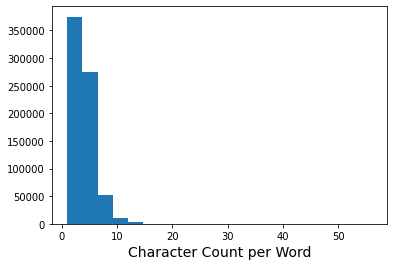

In [71]:
plt.hist(wsize, bins=20)
plt.xlabel(u'Character Count per Word',fontsize=14)
plt.show()

In [72]:
#@title Setup Khmer font for the graph (still not handling complex ligature like subscript)
# get Khmer font for matplotlib
from tempfile import NamedTemporaryFile
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
github_url = 'https://github.com/danhhong/KohSantepheap/blob/master/Release/KohSantepheap-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html
from urllib.request import urlopen
response = urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
khmer_font_prop = fm.FontProperties(fname=f.name,size=12)

Words: ['បាន', '។', 'ការ', 'នៅ', 'ដែល', 'ក្នុង', 'ជា', '"', 'ថា', 'របស់', 'និង', 'មាន', 'ពី', 'នេះ', 'ត្រូវ', 'នឹង', 'ដោយ', 'អ្នក', 'មួយ', 'នៃ']


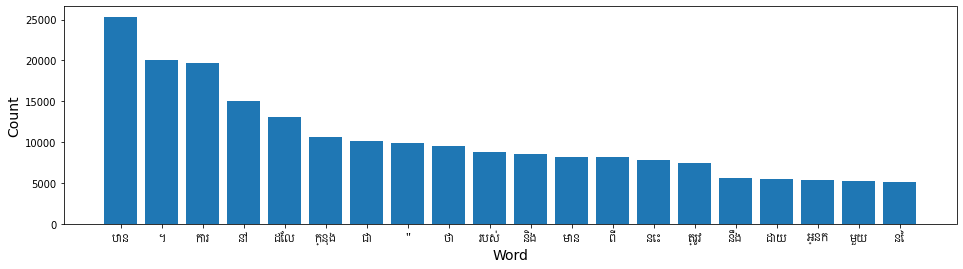

In [73]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt

data = d.most_common()[0:20]  # [('។', 797), ('បាន', 730), ('និង', 569)
print("Words:", [d[0] for d in data])
names = list(d[0] for d in data)
values = list(d[1] for d in data)

plt.figure(figsize=(16,4))
plt.bar(range(len(data)),values,tick_label=names)
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(khmer_font_prop)

plt.xlabel(u'Word',fontsize=14)
plt.ylabel(u'Count',fontsize=14)
plt.show()